Looking at mouse V1 RNAseq dataset from: https://portal.brain-map.org/atlases-and-data/rnaseq/mouse-v1-and-alm-smart-seq

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')

In [2]:
base_dir = r'/Users/marinag/Documents/Data/mouse_VISp_gene_expression_matrices_2018-06-14/'

gene_filename = 'mouse_VISp_2018-06-14_genes-rows.csv'
exon_filename = 'mouse_VISp_2018-06-14_exon-matrix.csv'
intron_filename = 'mouse_VISp_2018-06-14_intron-matrix.csv'
sample_filename = 'mouse_VISp_2018-06-14_samples-columns.csv'

In [3]:
genes = pd.read_csv(os.path.join(base_dir, gene_filename))
sample_info = pd.read_csv(os.path.join(base_dir, sample_filename))
exon_reads = pd.read_csv(os.path.join(base_dir, exon_filename))

In [4]:
# sample info is metadata for each cell (i.e. sample)
sample_info.head()

sample_name  sample_id sample_type      organism   donor sex  \
0  F1S4_160108_001_A01  527128530       Cells  Mus musculus  225675   M   
1  F1S4_160108_001_B01  527128536       Cells  Mus musculus  225675   M   
2  F1S4_160108_001_C01  527128542       Cells  Mus musculus  225675   M   
3  F1S4_160108_001_D01  527128548       Cells  Mus musculus  225675   M   
4  F1S4_160108_001_E01  527128554       Cells  Mus musculus  225675   M   

   age_days eye_condition                              genotype  \
0        53        Normal  Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt   
1        53        Normal  Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt   
2        53        Normal  Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt   
3        53        Normal  Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt   
4        53        Normal  Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt   

       driver_lines  ... genes_detected_cpm_criterion  \
0  Slc32a1-IRES-Cre  ...                        10445   
1  Slc32a1-IRES-Cre  ...                        11600   
2  Slc32a1-IRES-Cre  ...                        11848   
3  Slc32a1-IRES-Cre  ...                         9494   
4  Slc32a1-IRES-Cre  ...                        10012   

  genes_detected_fpkm_criterion tdt_cpm gfp_cpm      class subclass  \
0                          9222  248.86  248.86  GABAergic      Vip   
1                         10370  289.61  289.61  GABAergic    Lamp5   
2                         10734  281.06  281.06  GABAergic    Lamp5   
3                          8561  390.02  390.02  GABAergic      Vip   
4                          8791  253.92  253.92  GABAergic    Lamp5   

              cluster confusion_score cluster_correlation  \
0  Vip Arhgap36 Hmcn1          0.4385            0.837229   
1          Lamp5 Lsp1          0.1025            0.878743   
2          Lamp5 Lsp1          0.0195            0.887084   
3  Vip Crispld2 Htr2c          0.2734            0.843552   
4   Lamp5 Plch2 Dock5          0.7532            0.854994   

  core_intermediate_call  
0           Intermediate  
1                   Core  
2                   Core  
3                   Core  
4                   Core  

[5 rows x 50 columns]

In [5]:
# exon_reads is the expression level of each gene for each cell that was sampled
# expression level is measured as cpm = counts per million reads
exon_reads.head()

Unnamed: 0  F1S4_160108_001_A01  F1S4_160108_001_B01  F1S4_160108_001_C01  \
0       71661                    0                    0                    0   
1       76253                    0                    0                    0   
2       58520                   79                  121                   89   
3       66050                  140                  175                   68   
4   100125929                    0                    1                    0   

   F1S4_160108_001_D01  F1S4_160108_001_E01  F1S4_160108_001_F01  \
0                    0                    0                    0   
1                    0                    0                    0   
2                  115                  390                   61   
3                    0                  177                  110   
4                    0                    0                    0   

   F1S4_160108_001_G01  F1S4_160108_001_H01  F1S4_160108_002_A01  ...  \
0                    0                    0                    0  ...   
1                    0                    0                    0  ...   
2                   72                  161                  118  ...   
3                  149                   60                   61  ...   
4                    0                    0                    0  ...   

   FYS4_171004_103_G01  FYS4_171004_103_H01  FYS4_171004_104_A01  \
0                    0                    0                    0   
1                    0                    0                    0   
2                  263                   45                   88   
3                  136                   82                   74   
4                    0                    0                    0   

   FYS4_171004_104_B01  FYS4_171004_104_C01  FYS4_171004_104_D01  \
0                    0                    0                    0   
1                    0                    0                    0   
2                   81                  187                   99   
3                  104                   51                  160   
4                    0                    0                    0   

   FYS4_171004_104_E01  FYS4_171004_104_F01  FYS4_171004_104_G01  \
0                    0                    0                    0   
1                    0                    0                    0   
2                   49                  123                  112   
3                  165                  245                  179   
4                    0                    0                   25   

   FYS4_171004_104_H01  
0                    0  
1                    0  
2                   37  
3                   91  
4                    0  

[5 rows x 15414 columns]

In [6]:
# add gene_symbol column to expression data and set as the index
# can do this because the rows of exon_reads correspond to the rows of the genes metadata table
exon_reads['gene_symbol'] = genes['gene_symbol']
exon_reads = exon_reads.set_index('gene_symbol')
data = exon_reads.copy()

In [7]:
# clean up sample info to get just V1 neuronal cell types
cells = sample_info.copy()
cells = cells[cells.brain_region=='VISp']
cells = cells[cells['class'].isin(['GABAergic'])]
cells = cells[(cells.subclass.isin(['Meis2'])==False)]

In [137]:
cells.columns

Index(['sample_name', 'sample_id', 'sample_type', 'organism', 'donor', 'sex',
       'age_days', 'eye_condition', 'genotype', 'driver_lines',
       'reporter_lines', 'brain_hemisphere', 'brain_region', 'brain_subregion',
       'injection_label_direction', 'injection_primary', 'injection_secondary',
       'injection_tract', 'injection_material',
       'injection_exclusion_criterion', 'facs_date', 'facs_container',
       'facs_sort_criteria', 'rna_amplification_set', 'library_prep_set',
       'library_prep_avg_size_bp', 'seq_name', 'seq_tube', 'seq_batch',
       'total_reads', 'percent_exon_reads', 'percent_intron_reads',
       'percent_intergenic_reads', 'percent_rrna_reads',
       'percent_mt_exon_reads', 'percent_reads_unique', 'percent_synth_reads',
       'percent_ecoli_reads', 'percent_aligned_reads_total', 'complexity_cg',
       'genes_detected_cpm_criterion', 'genes_detected_fpkm_criterion',
       'tdt_cpm', 'gfp_cpm', 'class', 'subclass', 'cluster', 'confusion_score',

In [8]:
cells.sort_values(by='subclass').cluster.unique()

array(['Lamp5 Lsp1', 'Lamp5 Ntn1 Npy2r', 'Lamp5 Plch2 Dock5',
       'Lamp5 Krt73', 'Lamp5 Lhx6', 'Lamp5 Fam19a1 Pax6',
       'Lamp5 Fam19a1 Tmem182', 'Pvalb Reln Tac1', 'Pvalb Reln Itm2a',
       'Pvalb Gpr149 Islr', 'Pvalb Calb1 Sst', 'Pvalb Tpbg',
       'Pvalb Gabrg1', 'Pvalb Sema3e Kank4', 'Pvalb Akr1c18 Ntf3',
       'Pvalb Vipr2', 'Pvalb Th Sst', 'Serpinf1 Aqp5 Vip',
       'Serpinf1 Clrn1', 'Sncg Gpr50', 'Sncg Vip Itih5', 'Sncg Vip Nptx2',
       'Sncg Slc17a8', 'Sst Chrna2 Ptgdr', 'Sst Chrna2 Glra3',
       'Sst Nr2f2 Necab1', 'Sst Esm1', 'Sst Myh8 Fibin', 'Sst Hpse Cbln4',
       'Sst Myh8 Etv1 ', 'Sst Hpse Sema3c', 'Sst Rxfp1 Prdm8',
       'Sst Crh 4930553C11Rik ', 'Sst Tac1 Htr1d', 'Sst Rxfp1 Eya1',
       'Sst Crhr2 Efemp1', 'Sst Chodl', 'Sst Calb2 Pdlim5',
       'Sst Tac2 Myh4', 'Sst Tac1 Tacr3', 'Sst Tac2 Tacstd2', 'Sst Nts',
       'Sst Mme Fam114a1', 'Sst Calb2 Necab1', 'Vip Arhgap36 Hmcn1',
       'Vip Lmo1 Fam159b', 'Vip Gpc3 Slc18a3', 'Vip Lmo1 Myl1',
       'Vip

In [9]:
# get standard colors for subclasses
subclasses = ["Lamp5","Sncg","Serpinf1","Vip","Sst","Pvalb"]
subclass_colors = ["#F2ABB7","#C387E2","#E6B8FF","#D5A8DF","#E0B889","#EE98A4"]
colors_dict = {}
order_dict = {}
for i, subclass in enumerate(subclasses): 
    colors_dict[subclass] = subclass_colors[i]
    order_dict[subclass] = i

In [10]:
# set subclass order
cells['order'] = cells['subclass'].map(order_dict)
cells = cells.sort_values(by=['order', 'cluster'])
cells = cells.reset_index().drop(columns=['index'])

In [11]:
cells.cluster.unique()

array(['Lamp5 Fam19a1 Pax6', 'Lamp5 Fam19a1 Tmem182', 'Lamp5 Krt73',
       'Lamp5 Lhx6', 'Lamp5 Lsp1', 'Lamp5 Ntn1 Npy2r',
       'Lamp5 Plch2 Dock5', 'Sncg Gpr50', 'Sncg Slc17a8',
       'Sncg Vip Itih5', 'Sncg Vip Nptx2', 'Serpinf1 Aqp5 Vip',
       'Serpinf1 Clrn1', 'Vip Arhgap36 Hmcn1', 'Vip Chat Htr1f',
       'Vip Col15a1 Pde1a', 'Vip Crispld2 Htr2c', 'Vip Crispld2 Kcne4',
       'Vip Gpc3 Slc18a3', 'Vip Igfbp4 Mab21l1', 'Vip Igfbp6 Car10',
       'Vip Igfbp6 Pltp', 'Vip Lect1 Oxtr', 'Vip Lmo1 Fam159b',
       'Vip Lmo1 Myl1', 'Vip Ptprt Pkp2', 'Vip Pygm C1ql1',
       'Vip Rspo1 Itga4', 'Vip Rspo4 Rxfp1 Chat', 'Sst Calb2 Necab1',
       'Sst Calb2 Pdlim5', 'Sst Chodl', 'Sst Chrna2 Glra3',
       'Sst Chrna2 Ptgdr', 'Sst Crh 4930553C11Rik ', 'Sst Crhr2 Efemp1',
       'Sst Esm1', 'Sst Hpse Cbln4', 'Sst Hpse Sema3c',
       'Sst Mme Fam114a1', 'Sst Myh8 Etv1 ', 'Sst Myh8 Fibin',
       'Sst Nr2f2 Necab1', 'Sst Nts', 'Sst Rxfp1 Eya1', 'Sst Rxfp1 Prdm8',
       'Sst Tac1 Htr1d', 'S

In [12]:
clusters = cells.cluster.unique()

In [13]:
# sort exon reads by subclass & cluster
data = data[cells.sample_name.values]

In [14]:
from PIL import ImageColor
import matplotlib.colors as mpl_colors

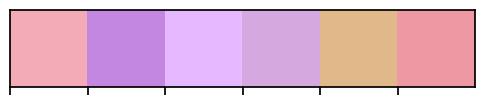

In [15]:
sns.palplot(["#F2ABB7","#C387E2","#E6B8FF","#D5A8DF","#E0B889","#EE98A4"])

In [16]:
subclass_colors_rgb = [ImageColor.getcolor(colors_dict[subclass], "RGB") for subclass in subclasses]

# normalize so rgb values are between 0 and 1
subclass_colors_dict = {}
for i, color in enumerate(subclass_colors_rgb):
    this_color = []
    for x in color:
        this_color.append(x/256.)
    subclass_colors_dict[subclasses[i]] = this_color
    

cell_colors = [subclass_colors_dict[subclass] for subclass in cells.subclass.values]

In [17]:
subclass_colors_dict

{'Lamp5': [0.9453125, 0.66796875, 0.71484375],
 'Sncg': [0.76171875, 0.52734375, 0.8828125],
 'Serpinf1': [0.8984375, 0.71875, 0.99609375],
 'Vip': [0.83203125, 0.65625, 0.87109375],
 'Sst': [0.875, 0.71875, 0.53515625],
 'Pvalb': [0.9296875, 0.59375, 0.640625]}

In [18]:
# # plot heatmap of expression levels, measured as counts per million reads
# g = sns.clustermap(data=data, vmin=0, vmax=np.percentile(data.values, 95), col_colors=cell_colors, row_cluster=False, col_cluster=False, 
#                    dendrogram_ratio=0.05, cbar_pos=None, yticklabels=data.index.values)
# print(subclasses)

### reformat data for analysis

In [19]:
# # get neuromod gene symbols
# neuromod_gene_symbols = neuromod_receptor_genes.gene_symbol.unique()

In [63]:
# genes_to_compare_with_merfish = ['Vip', 'Rspo2', 'Reln', 'Chat', 'Crh', 'Lamp5', 'Necab1', 'Chodl',
#        'Penk', 'Tac2', 'Ndnf', 'Pvalb', 'Nos1', 'Calb2', 'Calb1']

panel_genes = ['Gad2', 'Slc17a7', 'Sst', 'Pvalb', 'Vip', 'Tac1', 'Tac2', 'Npy', 'Crh', 'Penk', 'Ptprt', 'Kirrel3', 'Necab1', 'Cck',
 'Sncg', 'Calb2', 'Chat', 'Chodl', 'Hpse', 'Lhx6', 'Lamp5', 'Reln', 'Vipr2']

panel_genes = np.sort(panel_genes)
panel_genes

array(['Calb2', 'Cck', 'Chat', 'Chodl', 'Crh', 'Gad2', 'Hpse', 'Kirrel3',
       'Lamp5', 'Lhx6', 'Necab1', 'Npy', 'Penk', 'Ptprt', 'Pvalb', 'Reln',
       'Slc17a7', 'Sncg', 'Sst', 'Tac1', 'Tac2', 'Vip', 'Vipr2'],
      dtype='<U7')

In [64]:
matched_data = data.loc[panel_genes]
matched_data

sample_name  F1S4_160108_006_C01  F1S4_180124_303_H01  F1S4_180124_307_A01  \
gene_symbol                                                                  
Calb2                          0                    0                    0   
Cck                         3246                 2153                 3782   
Chat                           0                    0                    0   
Chodl                          0                    0                    0   
Crh                            0                    0                   13   
Gad2                        3722                 1642                 1273   
Hpse                           0                    0                    0   
Kirrel3                      565                    0                   19   
Lamp5                        200                  112                    0   
Lhx6                           0                    0                    0   
Necab1                      1852                  949                  756   
Npy                            1                    0                    0   
Penk                           0                   44                    0   
Ptprt                        177                    0                    0   
Pvalb                          0                    0                    0   
Reln                        3031                  852                  755   
Slc17a7                        0                    0                    0   
Sncg                           0                    0                    0   
Sst                            1                    0                    0   
Tac1                           0                    0                    0   
Tac2                           0                    0                    0   
Vip                            2                    0                    0   
Vipr2                          0                    0                    0   

sample_name  F1S4_180124_310_F01  F2S4_151223_001_G01  F2S4_151223_003_B01  \
gene_symbol                                                                  
Calb2                          0                    1                    0   
Cck                         2904                 2428                 1688   
Chat                           0                    0                    0   
Chodl                          0                    0                    0   
Crh                            0                    0                    0   
Gad2                        1218                 2138                 6114   
Hpse                           0                    0                    0   
Kirrel3                       76                  259                  142   
Lamp5                        418                    1                  549   
Lhx6                           0                    0                    0   
Necab1                      1479                 2461                 3541   
Npy                            0                  137                    4   
Penk                           0                    0                    0   
Ptprt                          0                  100                  316   
Pvalb                          0                    0                    0   
Reln                         843                  845                 1495   
Slc17a7                        0                    0                    0   
Sncg                           0                   31                    0   
Sst                            0                    1                    3   
Tac1                           0                    0                    0   
Tac2                           0                  548                    0   
Vip                            0                 9736                    8   
Vipr2                          0                    0                    0   

sample_name  F2S4_160114_014_B01  F2S4_160115_024_B01  F2S4_160115_026_A01  \
gene_symbol         

In [65]:
# cell metadata 
cells.head()

sample_name  sample_id sample_type      organism   donor sex  \
0  F1S4_160108_006_C01  527128109       Cells  Mus musculus  225675   M   
1  F1S4_180124_303_H01  665938258       Cells  Mus musculus  364990   M   
2  F1S4_180124_307_A01  665940643       Cells  Mus musculus  364990   M   
3  F1S4_180124_310_F01  665945058       Cells  Mus musculus  364990   M   
4  F2S4_151223_001_G01  527124705       Cells  Mus musculus  223184   M   

   age_days eye_condition                              genotype  \
0        53        Normal  Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt   
1        83        Normal        Rasgrf2-T2A-dgFlpO/wt;Ai65F/wt   
2        83        Normal        Rasgrf2-T2A-dgFlpO/wt;Ai65F/wt   
3        83        Normal        Rasgrf2-T2A-dgFlpO/wt;Ai65F/wt   
4        53        Normal  Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt   

         driver_lines  ... genes_detected_fpkm_criterion tdt_cpm gfp_cpm  \
0    Slc32a1-IRES-Cre  ...                          8641  203.52  203.52   
1  Rasgrf2-T2A-dgFlpO  ...                          7448  194.04  194.04   
2  Rasgrf2-T2A-dgFlpO  ...                          7196  190.28  190.28   
3  Rasgrf2-T2A-dgFlpO  ...                          6986  253.20  253.20   
4    Slc32a1-IRES-Cre  ...                          8983  154.15  154.15   

       class subclass             cluster confusion_score cluster_correlation  \
0  GABAergic    Lamp5  Lamp5 Fam19a1 Pax6          0.0763            0.869236   
1  GABAergic    Lamp5  Lamp5 Fam19a1 Pax6          0.7011            0.830613   
2  GABAergic    Lamp5  Lamp5 Fam19a1 Pax6          0.1537            0.842183   
3  GABAergic    Lamp5  Lamp5 Fam19a1 Pax6          0.4353            0.844519   
4  GABAergic    Lamp5  Lamp5 Fam19a1 Pax6          0.7845            0.862414   

  core_intermediate_call order  
0                   Core     0  
1                   Core     0  
2                   Core     0  
3                   Core     0  
4           Intermediate     0  

[5 rows x 51 columns]

In [66]:
# get relevant cell metadata and merge with expression data using the sample name
cell_metadata = cells[['class', 'subclass', 'cluster', 'order', 'sample_name']]
# transpose data and label index with sample name to merge with metadata
expression_data = matched_data.T
expression_data.index.name = 'sample_name'
# merge
expression_data = expression_data.merge(cell_metadata, on='sample_name')
expression_data.head()

sample_name  Calb2   Cck  Chat  Chodl  Crh  Gad2  Hpse  Kirrel3  \
0  F1S4_160108_006_C01      0  3246     0      0    0  3722     0      565   
1  F1S4_180124_303_H01      0  2153     0      0    0  1642     0        0   
2  F1S4_180124_307_A01      0  3782     0      0   13  1273     0       19   
3  F1S4_180124_310_F01      0  2904     0      0    0  1218     0       76   
4  F2S4_151223_001_G01      1  2428     0      0    0  2138     0      259   

   Lamp5  ...  Sncg  Sst  Tac1  Tac2   Vip  Vipr2      class  subclass  \
0    200  ...     0    1     0     0     2      0  GABAergic     Lamp5   
1    112  ...     0    0     0     0     0      0  GABAergic     Lamp5   
2      0  ...     0    0     0     0     0      0  GABAergic     Lamp5   
3    418  ...     0    0     0     0     0      0  GABAergic     Lamp5   
4      1  ...    31    1     0   548  9736      0  GABAergic     Lamp5   

              cluster  order  
0  Lamp5 Fam19a1 Pax6      0  
1  Lamp5 Fam19a1 Pax6      0  
2  Lamp5 Fam19a1 Pax6      0  
3  Lamp5 Fam19a1 Pax6      0  
4  Lamp5 Fam19a1 Pax6      0  

[5 rows x 28 columns]

In [67]:
# reformat expression data to list the expression values per gene as unique rows
melted_df = expression_data.melt(id_vars=['class', 'subclass', 'cluster', 'order', 'sample_name'], var_name='gene_symbol', value_name='cpm')
melted_df.head()

class subclass             cluster  order          sample_name  \
0  GABAergic    Lamp5  Lamp5 Fam19a1 Pax6      0  F1S4_160108_006_C01   
1  GABAergic    Lamp5  Lamp5 Fam19a1 Pax6      0  F1S4_180124_303_H01   
2  GABAergic    Lamp5  Lamp5 Fam19a1 Pax6      0  F1S4_180124_307_A01   
3  GABAergic    Lamp5  Lamp5 Fam19a1 Pax6      0  F1S4_180124_310_F01   
4  GABAergic    Lamp5  Lamp5 Fam19a1 Pax6      0  F2S4_151223_001_G01   

  gene_symbol  cpm  
0       Calb2    0  
1       Calb2    0  
2       Calb2    0  
3       Calb2    0  
4       Calb2    1

In [68]:
len(melted_df)

139840

In [69]:
# # add receptor type column
# melted_df = melted_df.merge(neuromod_receptor_genes[['gene_symbol', 'receptor_type']], on='gene_symbol')
# melted_df.head()

In [70]:
len(melted_df)

139840

### quantify expression levels across all cells

In [71]:
def get_stats(group):
    n_cells = len(group)
    fraction = len(group[group.cpm>1])/float(n_cells)
    mean = np.mean(group.cpm.values)
    std = np.std(group.cpm.values)
    percentile_95 = np.percentile(group.cpm.values, 95)
    return pd.Series({'mean_cpm':mean, 'std_cpm':std, 
                      'percentile_95':percentile_95,
                      'fraction_cells_expressing':fraction})

In [72]:
# get basic statistics on expression of each gene across cells
gene_stats = melted_df.groupby(['gene_symbol']).apply(get_stats)
gene_stats = gene_stats.reset_index().merge(genes[['gene_symbol', 'gene_name']], on='gene_symbol', how='left')

/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_40533/2039285093.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gene_stats = melted_df.groupby(['gene_symbol']).apply(get_stats)


In [73]:
gene_stats

gene_symbol      mean_cpm       std_cpm  percentile_95  \
0        Calb2    757.958717   1992.612499        4968.20   
1          Cck    813.846546   2456.228287        4371.20   
2         Chat     12.890789     72.444545          37.00   
3        Chodl     26.932072    236.942547           0.00   
4          Crh   1449.701645   3723.596793        9894.40   
5         Gad2   1631.788651   1423.629523        4541.10   
6         Hpse      5.776316     47.007477           0.00   
7      Kirrel3     65.394079    137.562006         336.05   
8        Lamp5    599.667434   1470.999375        4226.10   
9         Lhx6    106.389967    167.458903         435.05   
10      Necab1    284.126809    495.166813        1311.10   
11         Npy   6764.774342  16005.195627       41803.45   
12        Penk   1619.617434   4436.324411       10196.80   
13       Ptprt     93.142434    190.745057         492.05   
14       Pvalb    453.540954   1159.441405        2764.05   
15        Reln    355.622697    708.834332        1851.20   
16     Slc17a7      0.572862      4.566067           1.00   
17        Sncg     15.510526    128.696500           0.00   
18         Sst   4785.214145  10848.742280       27426.20   
19        Tac1    662.057072   2240.021382        4328.50   
20        Tac2   1414.483882   4003.094130       10455.55   
21         Vip  13226.976480  26012.184093       71039.05   
22       Vipr2      0.986020     15.434155           0.00   

    fraction_cells_expressing  \
0                    0.281086   
1                    0.507237   
2                    0.059211   
3                    0.023191   
4                    0.360033   
5                    0.998191   
6                    0.041941   
7                    0.463487   
8                    0.227796   
9                    0.505592   
10                   0.536842   
11                   0.706414   
12                   0.391776   
13                   0.416612   
14                   0.357895   
15                   0.485855   
16                   0.038322   
17                   0.031414   
18                   0.468421   
19                   0.220066   
20                   0.249178   
21                   0.556250   
22                   0.009046   

                                            gene_name  
0                                         calbindin 2  
1                                     cholecystokinin  
2                           choline acetyltransferase  
3                                       chondrolectin  
4                     corticotropin releasing hormone  
5                       glutamic acid decarboxylase 2  
6                                          heparanase  
7                     kin of IRRE like 3 (Drosophila)  
8   lysosomal-associated membrane protein family, ...  
9                              LIM homeobox protein 6  
10       N-terminal EF-hand calcium binding protein 1  
11                                     neuropeptide Y  
12                                   preproenkephalin  
13     protein tyrosine phosphatase, receptor type, T  
14                                        parvalbumin  
15                                             reelin  
16  solute carrier family 17 (sodium-dependent ino...  
17                                   synuclein, gamma  
18                                       somatostatin  
19                                       tachykinin 1  
20                                       tachykinin 2  
21                  vasoactive intestinal polypeptide  
22           vasoactive intestinal peptide receptor 2

In [74]:
# highly expressed genes - mean
gene_stats.sort_values(by=['mean_cpm'], ascending=False).head(10)

gene_symbol      mean_cpm       std_cpm  percentile_95  \
21         Vip  13226.976480  26012.184093       71039.05   
11         Npy   6764.774342  16005.195627       41803.45   
18         Sst   4785.214145  10848.742280       27426.20   
5         Gad2   1631.788651   1423.629523        4541.10   
12        Penk   1619.617434   4436.324411       10196.80   
4          Crh   1449.701645   3723.596793        9894.40   
20        Tac2   1414.483882   4003.094130       10455.55   
1          Cck    813.846546   2456.228287        4371.20   
0        Calb2    757.958717   1992.612499        4968.20   
19        Tac1    662.057072   2240.021382        4328.50   

    fraction_cells_expressing                          gene_name  
21                   0.556250  vasoactive intestinal polypeptide  
11                   0.706414                     neuropeptide Y  
18                   0.468421                       somatostatin  
5                    0.998191      glutamic acid decarboxylase 2  
12                   0.391776                   preproenkephalin  
4                    0.360033    corticotropin releasing hormone  
20                   0.249178                       tachykinin 2  
1                    0.507237                    cholecystokinin  
0                    0.281086                        calbindin 2  
19                   0.220066                       tachykinin 1

In [75]:
# highly expressed genes - 95th percentile
gene_stats.sort_values(by=['percentile_95'], ascending=False).head(10)

gene_symbol      mean_cpm       std_cpm  percentile_95  \
21         Vip  13226.976480  26012.184093       71039.05   
11         Npy   6764.774342  16005.195627       41803.45   
18         Sst   4785.214145  10848.742280       27426.20   
20        Tac2   1414.483882   4003.094130       10455.55   
12        Penk   1619.617434   4436.324411       10196.80   
4          Crh   1449.701645   3723.596793        9894.40   
0        Calb2    757.958717   1992.612499        4968.20   
5         Gad2   1631.788651   1423.629523        4541.10   
1          Cck    813.846546   2456.228287        4371.20   
19        Tac1    662.057072   2240.021382        4328.50   

    fraction_cells_expressing                          gene_name  
21                   0.556250  vasoactive intestinal polypeptide  
11                   0.706414                     neuropeptide Y  
18                   0.468421                       somatostatin  
20                   0.249178                       tachykinin 2  
12                   0.391776                   preproenkephalin  
4                    0.360033    corticotropin releasing hormone  
0                    0.281086                        calbindin 2  
5                    0.998191      glutamic acid decarboxylase 2  
1                    0.507237                    cholecystokinin  
19                   0.220066                       tachykinin 1

In [76]:
# highly variable genes
gene_stats.sort_values(by=['std_cpm'], ascending=False).head(10)

gene_symbol      mean_cpm       std_cpm  percentile_95  \
21         Vip  13226.976480  26012.184093       71039.05   
11         Npy   6764.774342  16005.195627       41803.45   
18         Sst   4785.214145  10848.742280       27426.20   
12        Penk   1619.617434   4436.324411       10196.80   
20        Tac2   1414.483882   4003.094130       10455.55   
4          Crh   1449.701645   3723.596793        9894.40   
1          Cck    813.846546   2456.228287        4371.20   
19        Tac1    662.057072   2240.021382        4328.50   
0        Calb2    757.958717   1992.612499        4968.20   
8        Lamp5    599.667434   1470.999375        4226.10   

    fraction_cells_expressing  \
21                   0.556250   
11                   0.706414   
18                   0.468421   
12                   0.391776   
20                   0.249178   
4                    0.360033   
1                    0.507237   
19                   0.220066   
0                    0.281086   
8                    0.227796   

                                            gene_name  
21                  vasoactive intestinal polypeptide  
11                                     neuropeptide Y  
18                                       somatostatin  
12                                   preproenkephalin  
20                                       tachykinin 2  
4                     corticotropin releasing hormone  
1                                     cholecystokinin  
19                                       tachykinin 1  
0                                         calbindin 2  
8   lysosomal-associated membrane protein family, ...

In [77]:
# commonly expressed genes
gene_stats.sort_values(by=['fraction_cells_expressing'], ascending=False).head(10)

gene_symbol      mean_cpm       std_cpm  percentile_95  \
5         Gad2   1631.788651   1423.629523        4541.10   
11         Npy   6764.774342  16005.195627       41803.45   
21         Vip  13226.976480  26012.184093       71039.05   
10      Necab1    284.126809    495.166813        1311.10   
1          Cck    813.846546   2456.228287        4371.20   
9         Lhx6    106.389967    167.458903         435.05   
15        Reln    355.622697    708.834332        1851.20   
18         Sst   4785.214145  10848.742280       27426.20   
7      Kirrel3     65.394079    137.562006         336.05   
13       Ptprt     93.142434    190.745057         492.05   

    fraction_cells_expressing                                       gene_name  
5                    0.998191                   glutamic acid decarboxylase 2  
11                   0.706414                                  neuropeptide Y  
21                   0.556250               vasoactive intestinal polypeptide  
10                   0.536842    N-terminal EF-hand calcium binding protein 1  
1                    0.507237                                 cholecystokinin  
9                    0.505592                          LIM homeobox protein 6  
15                   0.485855                                          reelin  
18                   0.468421                                    somatostatin  
7                    0.463487                 kin of IRRE like 3 (Drosophila)  
13                   0.416612  protein tyrosine phosphatase, receptor type, T

### quantify average gene expression patterns for each cell subclass or cluster

In [78]:
# get descriptive stats for each gene within each cell subclass
cluster_stats = melted_df.groupby(['cluster', 'gene_symbol']).apply(get_stats)
cluster_stats

/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_40533/571759958.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_stats = melted_df.groupby(['cluster', 'gene_symbol']).apply(get_stats)


mean_cpm       std_cpm  percentile_95  \
cluster              gene_symbol                                              
Lamp5 Fam19a1 Pax6   Calb2            0.209302      0.700768            1.0   
                     Cck           3828.116279   2287.336729         8442.9   
                     Chat             0.000000      0.000000            0.0   
                     Chodl            0.000000      0.000000            0.0   
                     Crh             33.418605    202.560268           12.5   
...                                        ...           ...            ...   
Vip Rspo4 Rxfp1 Chat Sst              0.567164      1.135898            2.7   
                     Tac1             0.074627      0.262788            1.0   
                     Tac2          8200.940299   4306.291392        15740.5   
                     Vip          38260.522388  17888.613788        66437.2   
                     Vipr2            2.044776     16.611840            0.0   

                                  fraction_cells_expressing  
cluster              gene_symbol                             
Lamp5 Fam19a1 Pax6   Calb2                         0.046512  
                     Cck                           1.000000  
                     Chat                          0.000000  
                     Chodl                         0.000000  
                     Crh                           0.162791  
...                                                     ...  
Vip Rspo4 Rxfp1 Chat Sst                           0.119403  
                     Tac1                          0.000000  
                     Tac2                          0.985075  
                     Vip                           1.000000  
                     Vipr2                         0.014925  

[1380 rows x 4 columns]

In [79]:
# transpose expression data and merge with cell metadata, then average across cells for each cluster
df = matched_data.T.copy()
# df.set_index('sample_name')
# df.index.name = 'sample_name'

df = df.merge(cells[['sample_name', 'class', 'subclass', 'cluster', 'order']], on='sample_name')

# now instead of melting into df with one row per gene per sample as above, we take the average across cells in a given cluster
mean_df = df.groupby(['cluster'])[panel_genes].mean()
mean_df.head(2)

Calb2          Cck      Chat  Chodl        Crh  \
cluster                                                                    
Lamp5 Fam19a1 Pax6     0.209302  3828.116279  0.000000    0.0  33.418605   
Lamp5 Fam19a1 Tmem182  0.239130  1037.043478  0.021739    0.0   0.326087   

                              Gad2  Hpse     Kirrel3        Lamp5      Lhx6  \
cluster                                                                       
Lamp5 Fam19a1 Pax6     2801.116279   0.0  217.674419   429.581395  0.023256   
Lamp5 Fam19a1 Tmem182  2766.391304   0.0  168.782609  1529.978261  0.021739   

                       ...       Ptprt     Pvalb         Reln   Slc17a7  \
cluster                ...                                                
Lamp5 Fam19a1 Pax6     ...   65.627907  0.023256  1600.767442  0.000000   
Lamp5 Fam19a1 Tmem182  ...  390.217391  0.021739  1787.434783  0.021739   

                            Sncg       Sst      Tac1         Tac2         Vip  \
cluster                                                                         
Lamp5 Fam19a1 Pax6     13.279070  1.139535  0.000000   218.837209  532.279070   
Lamp5 Fam19a1 Tmem182   0.021739  0.891304  0.086957  1945.239130    6.782609   

                          Vipr2  
cluster                          
Lamp5 Fam19a1 Pax6     0.000000  
Lamp5 Fam19a1 Tmem182  0.391304  

[2 rows x 23 columns]

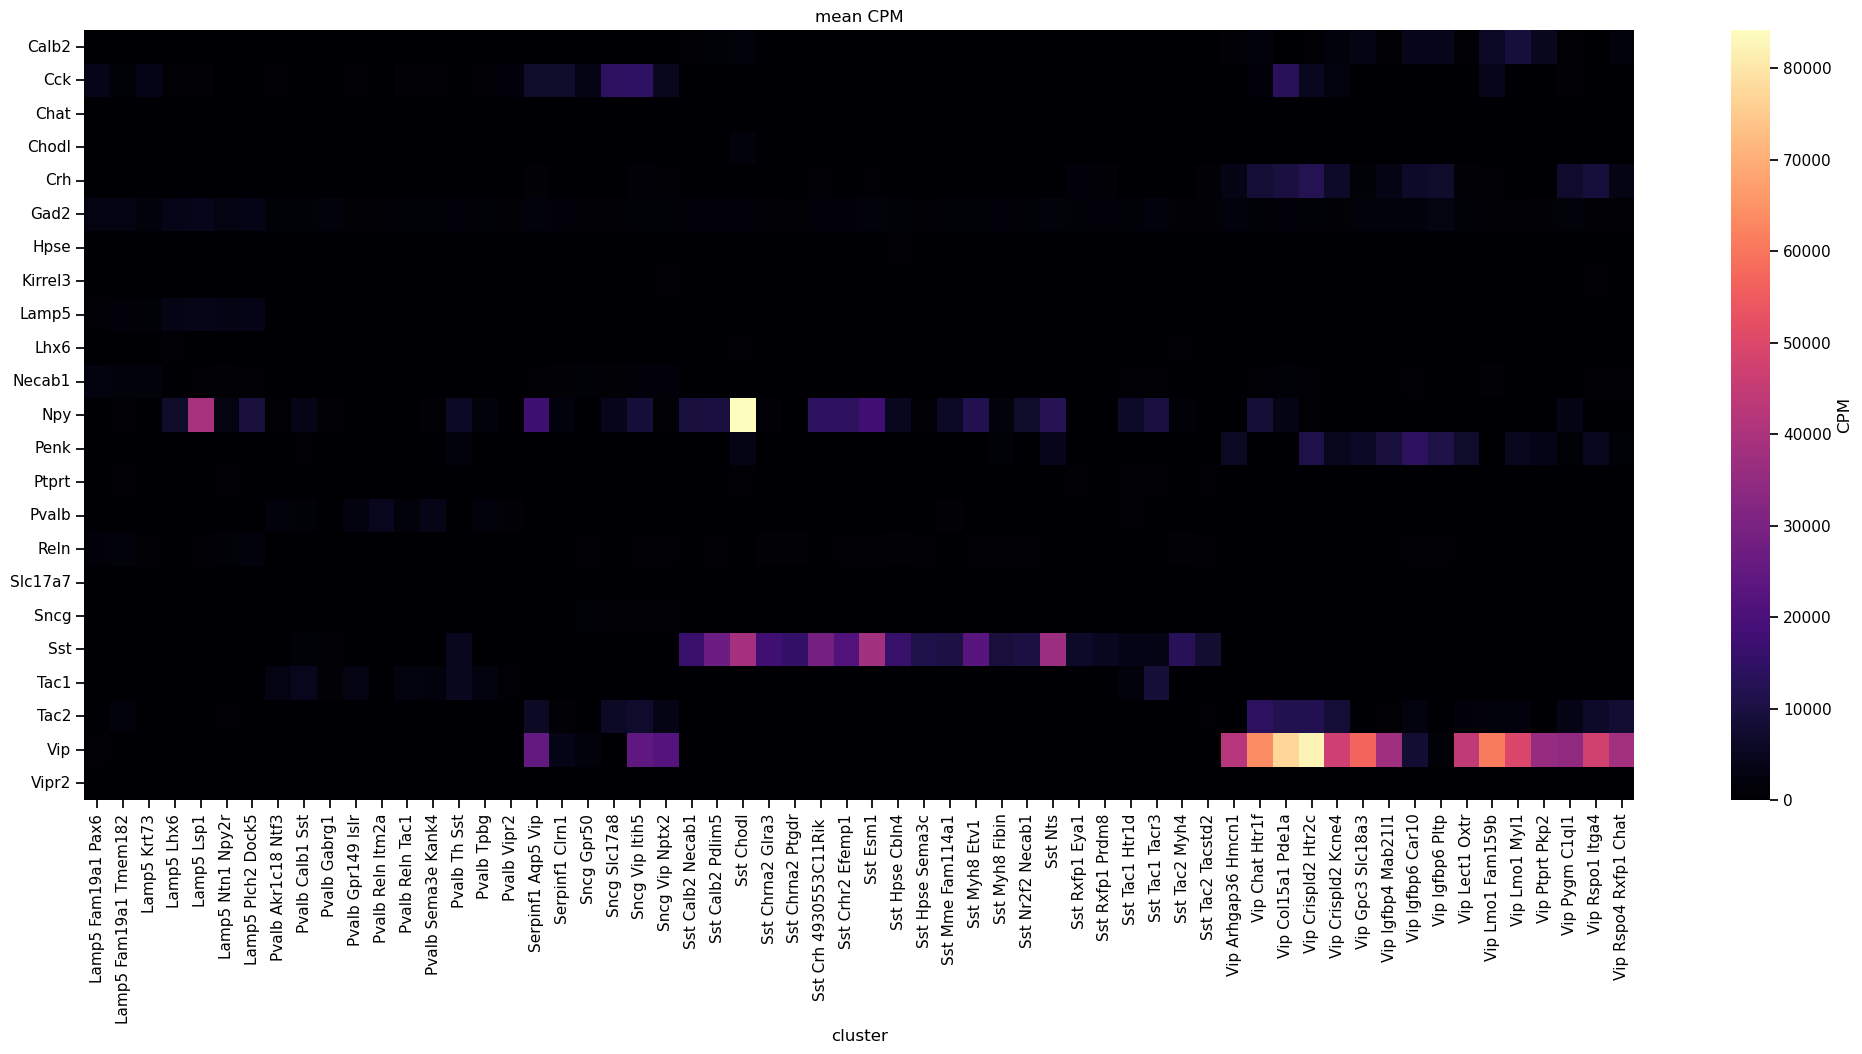

In [80]:
# plot average gene expression across clusters - no limit on color scale
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.heatmap(mean_df.T, cmap='magma', 
                 cbar_kws={'label':'CPM'}, ax=ax) #norm=LogNorm(), 
ax.set_title('mean CPM')
ax.set_xticks(np.arange(0.5, len(mean_df.T.columns)+0.5))
ax.set_yticks(np.arange(0.5, len(mean_df.T.index)+0.5))
ax.set_xticklabels(mean_df.T.columns)
ax.set_yticklabels(mean_df.T.index);

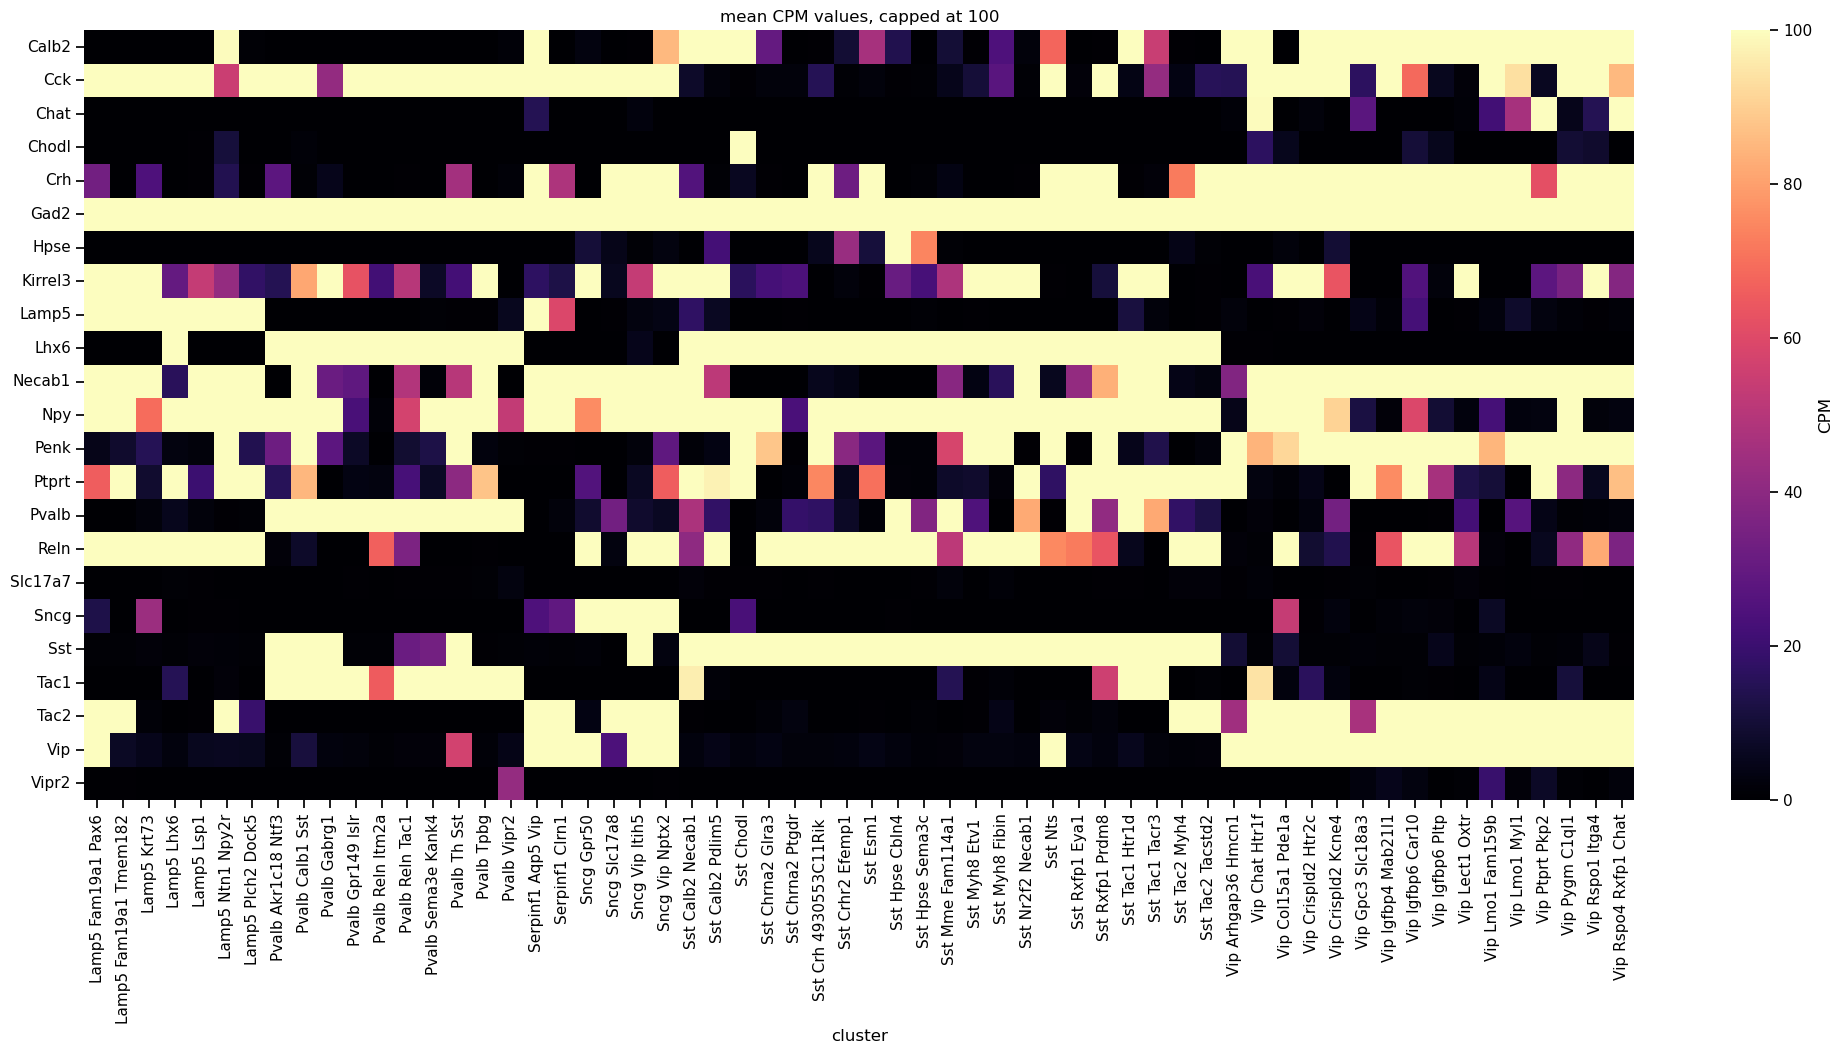

In [81]:
# plot average gene expression across clusters - limit to some max value
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.heatmap(mean_df.T, cmap='magma', vmin=0, vmax=100,
                 cbar_kws={'label':'CPM'}, ax=ax) #norm=LogNorm(), 
ax.set_title('mean CPM values, capped at 100')
ax.set_xticks(np.arange(0.5, len(mean_df.T.columns)+0.5))
ax.set_yticks(np.arange(0.5, len(mean_df.T.index)+0.5))
ax.set_xticklabels(mean_df.T.columns)
ax.set_yticklabels(mean_df.T.index);

expression levels are super widely distributed, probably want to normalize (as in Smith et al., 2019)

In [130]:
# normalize to 95th percentile of average gene expression across cell clusters
max_values = np.percentile(mean_df, 98, axis=0)
max_values = pd.Series(data=max_values, index=mean_df.columns)
normalized = mean_df/max_values

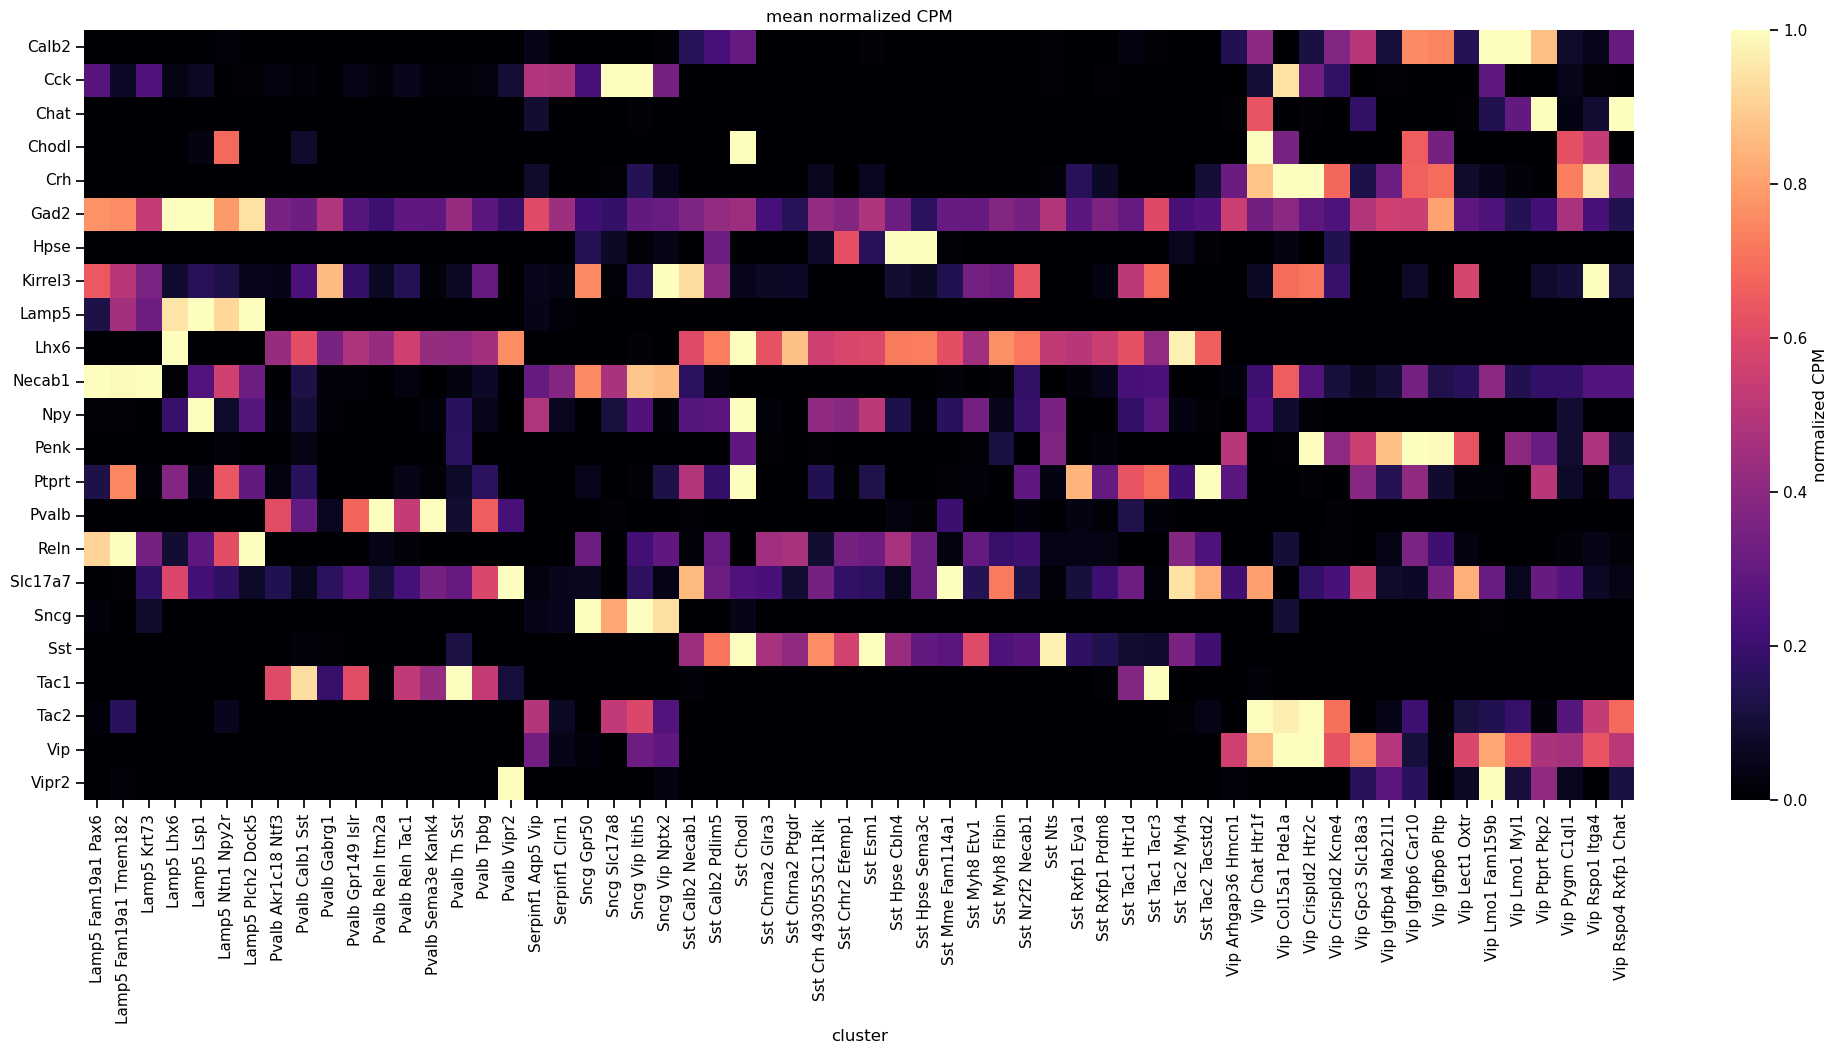

In [131]:
# from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.heatmap(normalized.T, cmap='magma', vmin=0, vmax=1,
                 cbar_kws={'label':'normalized CPM'}, ax=ax) #norm=LogNorm(), 
ax.set_title('mean normalized CPM')
ax.set_xticks(np.arange(0.5, len(normalized.T.columns)+0.5))
ax.set_yticks(np.arange(0.5, len(normalized.T.index)+0.5))
ax.set_xticklabels(normalized.T.columns)
ax.set_yticklabels(normalized.T.index);

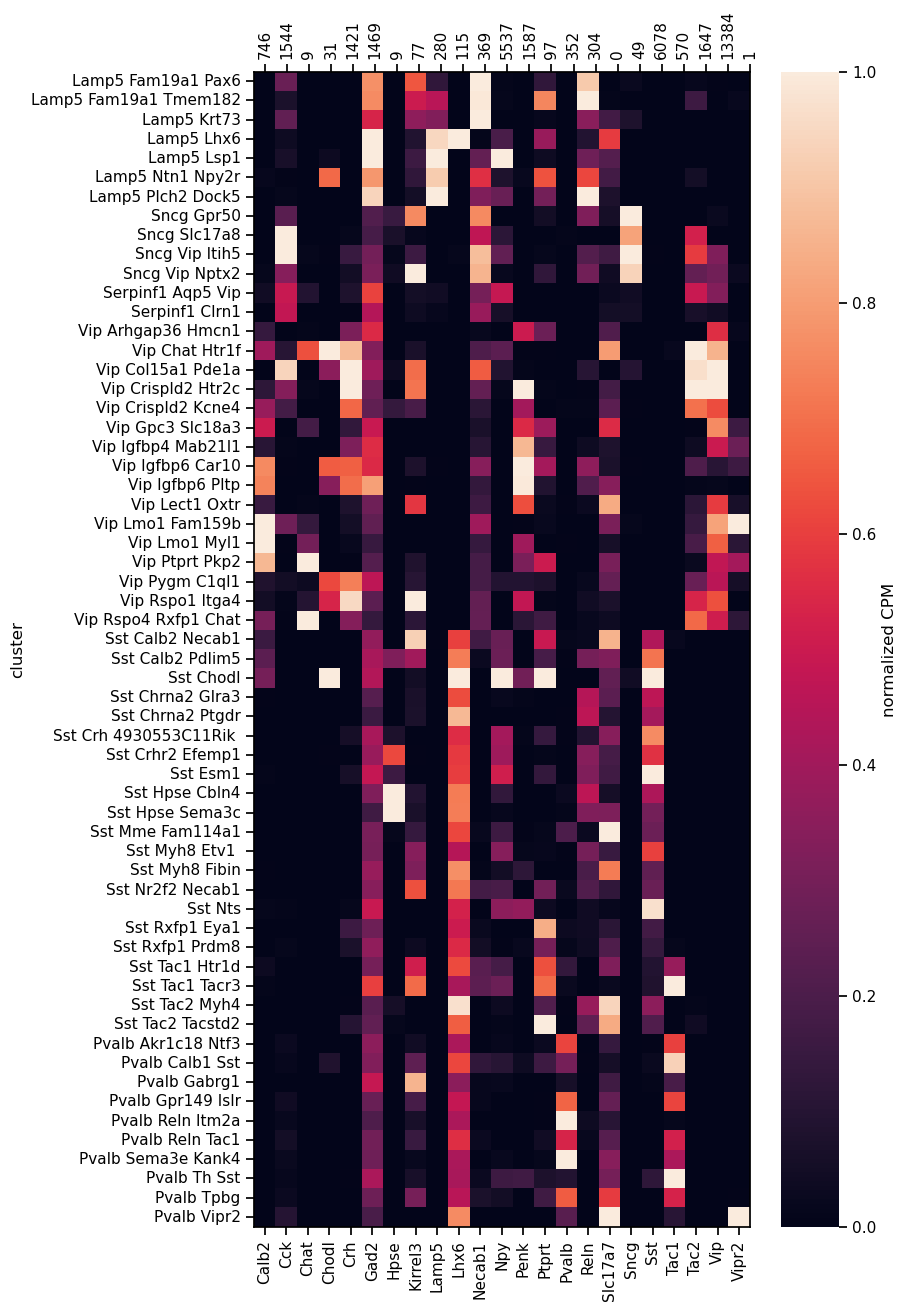

In [133]:
# sorted_genes = ['Vip', 'Calb2', 'Penk', 'Crh', 'Chat', 
#                 'Tac2', 'Necab1', 'Reln', 'Lamp5', 'Ndnf', 'Nos1', 'Chodl',
#                 'Pvalb', 'Calb1', 'Rspo2']
       
      
fig, ax = plt.subplots(figsize=(8,15))

ax = sns.heatmap(normalized.loc[clusters][panel_genes], vmax=1, cbar_kws={'label':'normalized CPM'}, )
ax2 = ax.twiny()
mean_cpms = mean_df.mean(axis=0).values
ax2.set_xticks(np.arange(0.5, len(mean_cpms)+0.5))
ax2.set_xticklabels([int(mean_cpm) for mean_cpm in mean_cpms], rotation=90);

/Users/marinag/anaconda3/envs/learning_mFISH/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


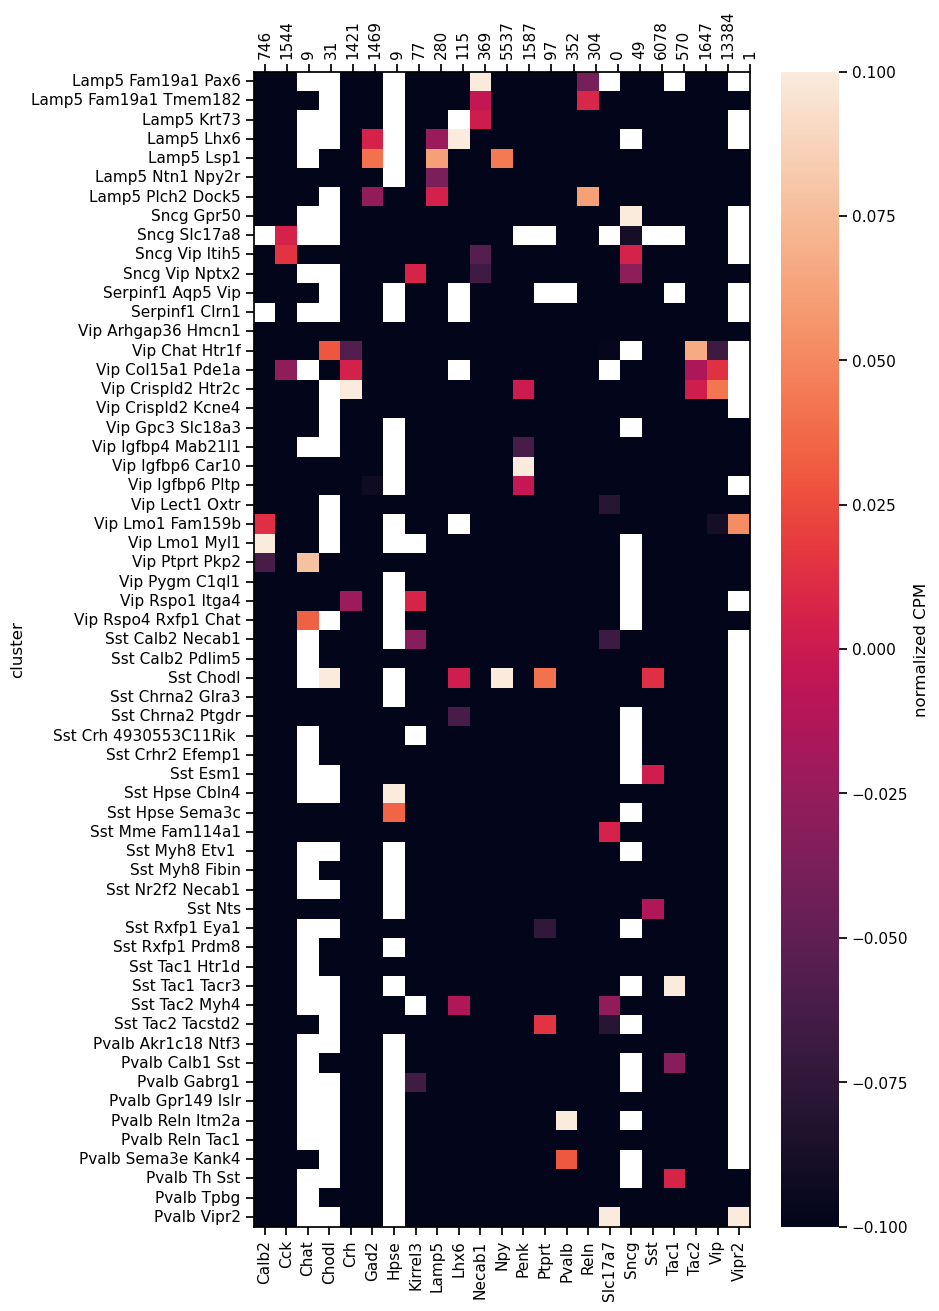

In [135]:
# sorted_genes = ['Vip', 'Calb2', 'Penk', 'Crh', 'Chat', 
#                 'Tac2', 'Necab1', 'Reln', 'Lamp5', 'Ndnf', 'Nos1', 'Chodl',
#                 'Pvalb', 'Calb1', 'Rspo2']
       
      
fig, ax = plt.subplots(figsize=(8,15))

ax = sns.heatmap(np.log10(normalized.loc[clusters][panel_genes]), cbar_kws={'label':'normalized CPM'}, )
ax2 = ax.twiny()
mean_cpms = mean_df.mean(axis=0).values
ax2.set_xticks(np.arange(0.5, len(mean_cpms)+0.5))
ax2.set_xticklabels([int(mean_cpm) for mean_cpm in mean_cpms], rotation=90);

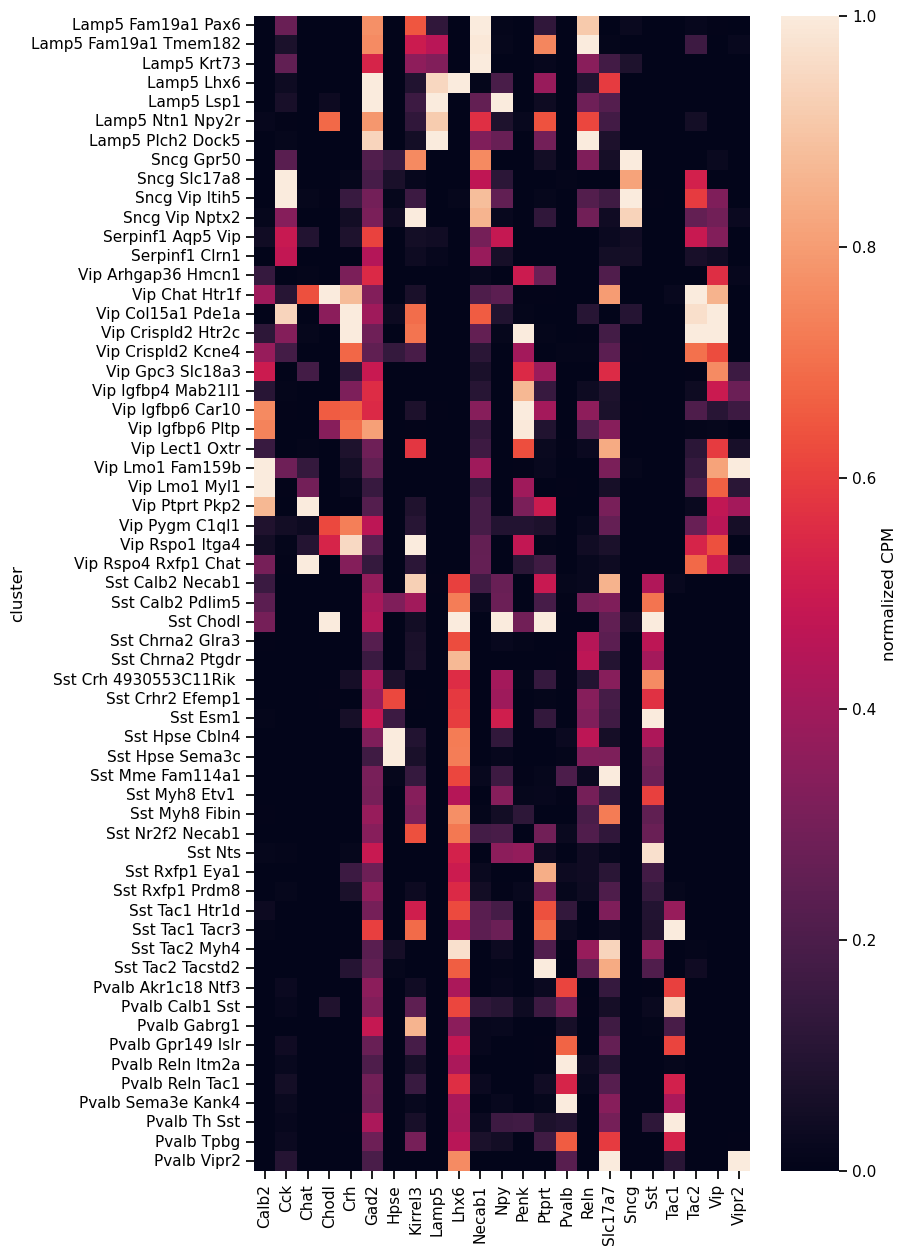

In [100]:
# sorted_genes = ['Vip', 'Calb2', 'Penk', 'Crh', 'Chat', 
#                 'Tac2', 'Necab1', 'Reln', 'Lamp5', 'Ndnf', 'Nos1', 'Chodl',
#                 'Pvalb', 'Calb1', 'Rspo2']
       
       
fig, ax = plt.subplots(figsize=(8,15))

ax = sns.heatmap(normalized.loc[clusters][panel_genes], vmax=1, cbar_kws={'label':'normalized CPM'}, )


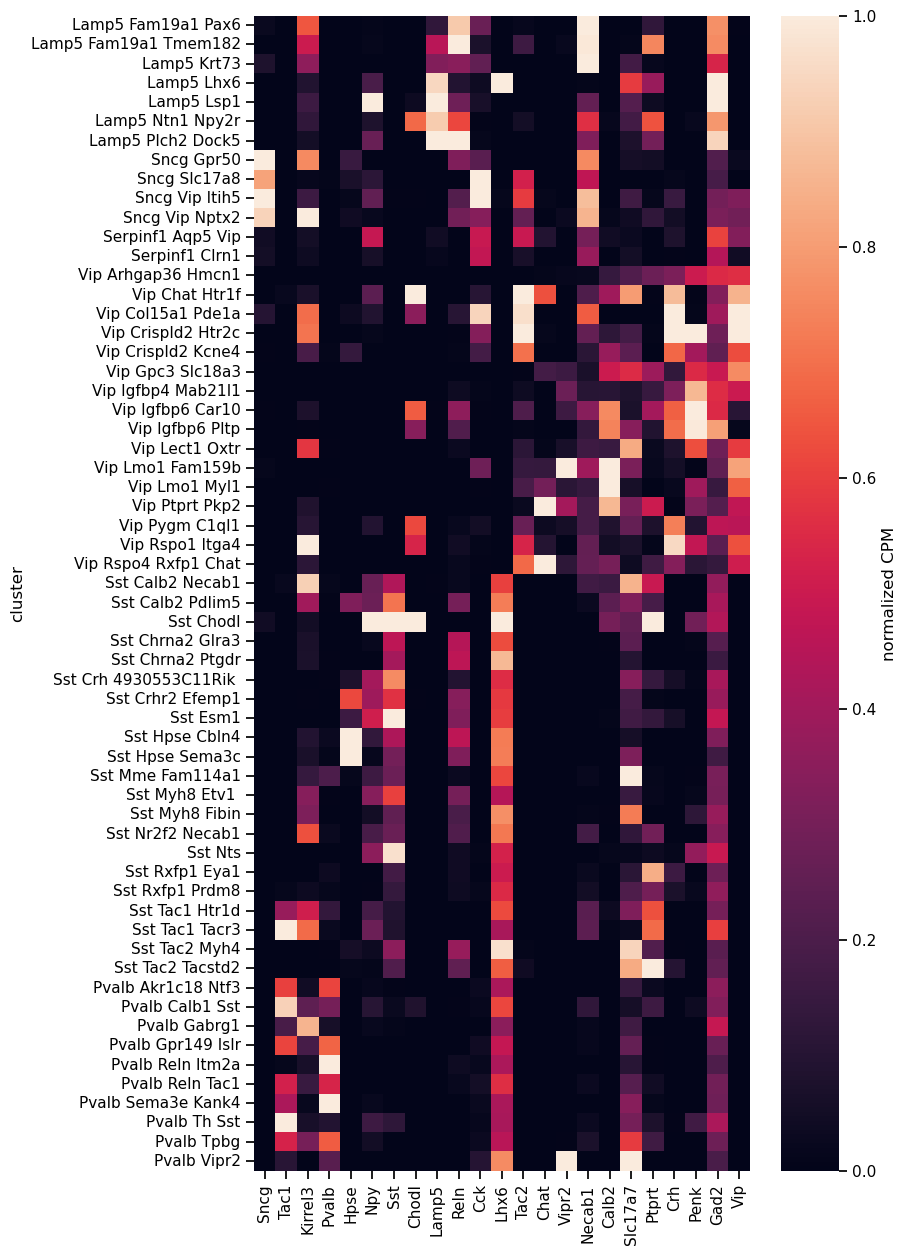

In [87]:
# sort by Vip chat

cluster_to_map_to = 'Vip Arhgap36 Hmcn1'
# cluster_to_map_to = 'Sncg Vip Nptx2'
# cluster_to_map_to = 'Sncg Gpr50'

gene_order = np.argsort(normalized.loc[cluster_to_map_to].values)
gene_order = normalized.columns[gene_order]
       
fig, ax = plt.subplots(figsize=(8,15))

ax = sns.heatmap(normalized.loc[clusters][gene_order], vmax=1, cbar_kws={'label':'normalized CPM'}, )


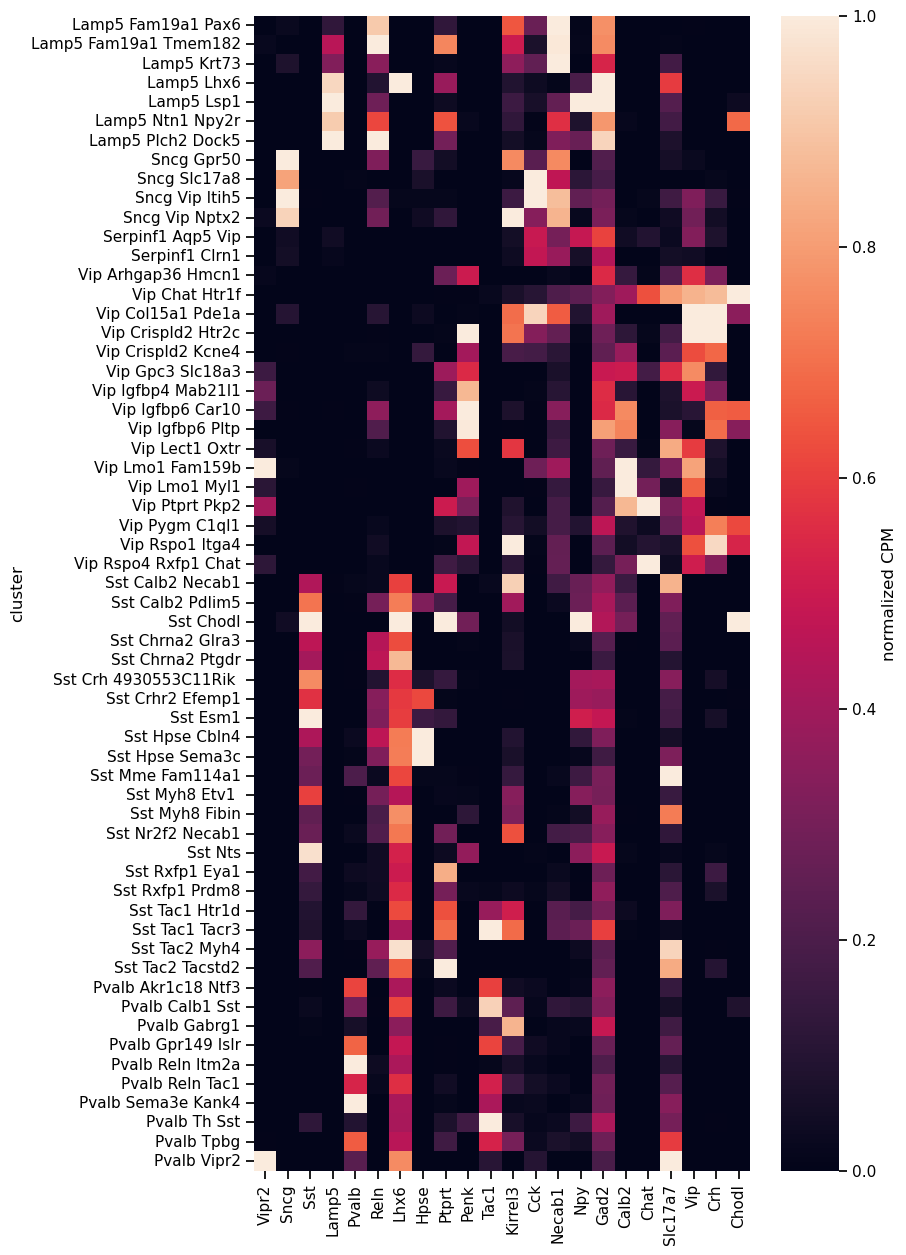

In [60]:
# sort by Vip chat

cluster_to_map_to = 'Vip Chat Htr1f'
# cluster_to_map_to = 'Sncg Vip Nptx2'
# cluster_to_map_to = 'Sncg Gpr50'

gene_order = np.argsort(normalized.loc[cluster_to_map_to].values)
gene_order = normalized.columns[gene_order]
       
fig, ax = plt.subplots(figsize=(8,15))

ax = sns.heatmap(normalized.loc[clusters][gene_order], vmax=1, cbar_kws={'label':'normalized CPM'}, )


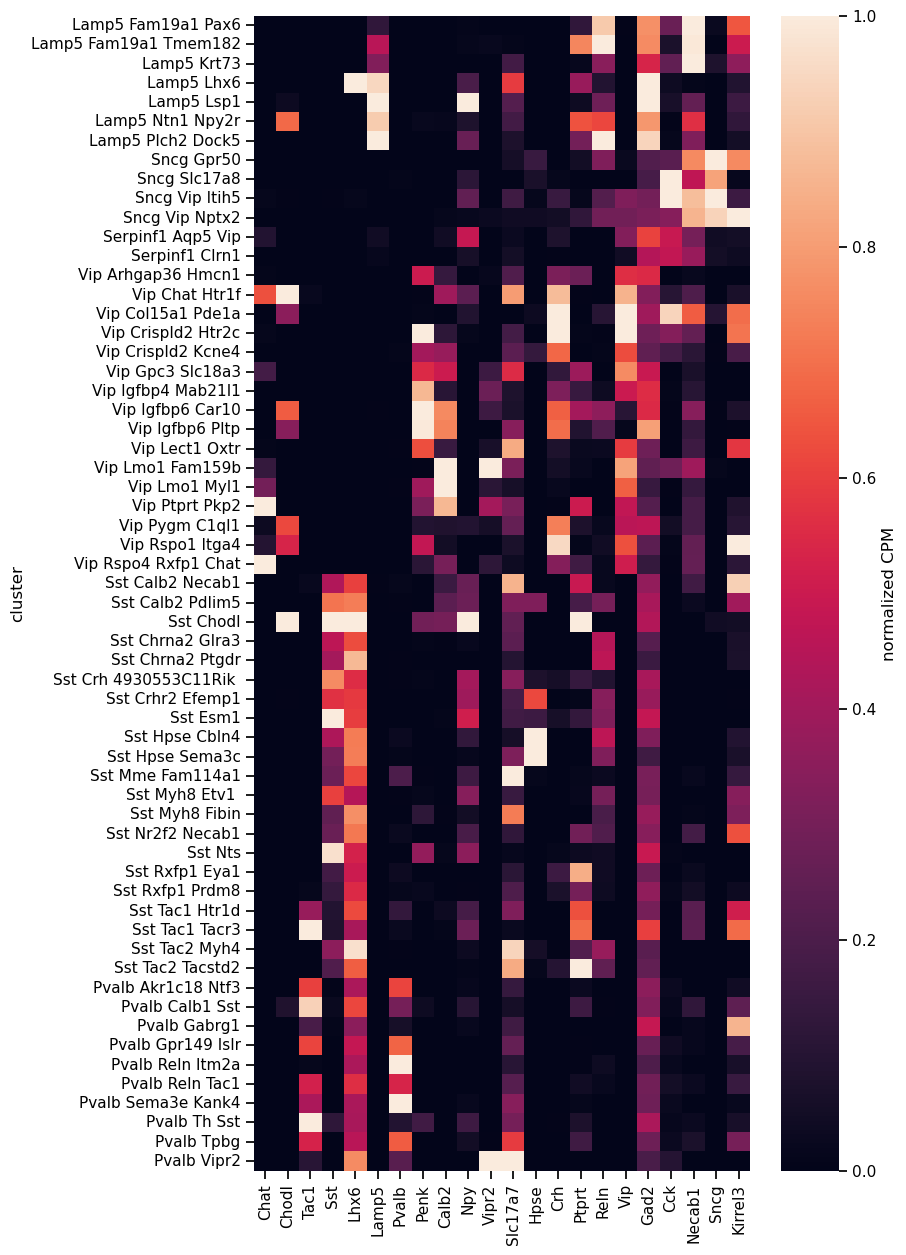

In [59]:
# sort by Vip chat

cluster_to_map_to = 'Vip Chat Htr1f'
cluster_to_map_to = 'Sncg Vip Nptx2'
# cluster_to_map_to = 'Sncg Gpr50'

gene_order = np.argsort(normalized.loc[cluster_to_map_to].values)
gene_order = normalized.columns[gene_order]
       
fig, ax = plt.subplots(figsize=(8,15))

ax = sns.heatmap(normalized.loc[clusters][gene_order], vmax=1, cbar_kws={'label':'normalized CPM'}, )


### For each cluster plot the relative normalized expression of each of the merfish genes

/var/folders/bp/23y492js7lz2gvjzgsw6cg_m0000gp/T/ipykernel_40533/1897645279.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10,1))


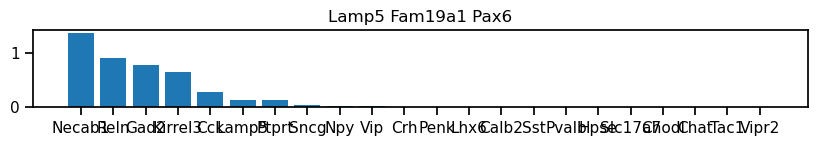

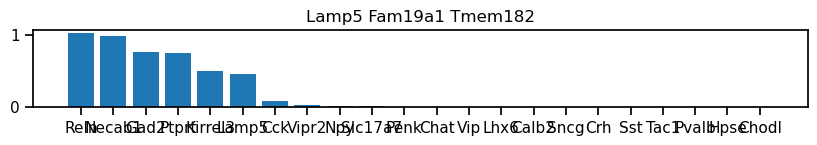

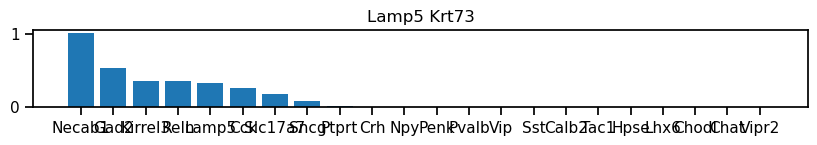

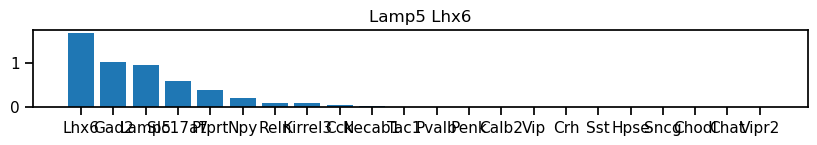

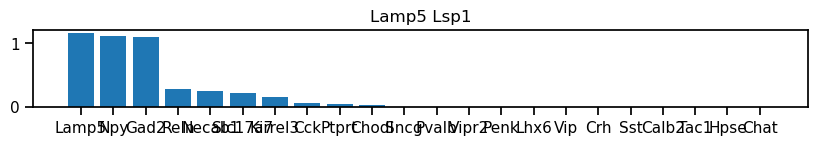

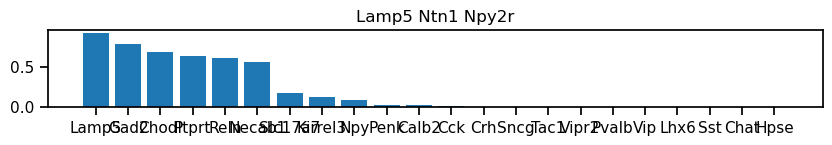

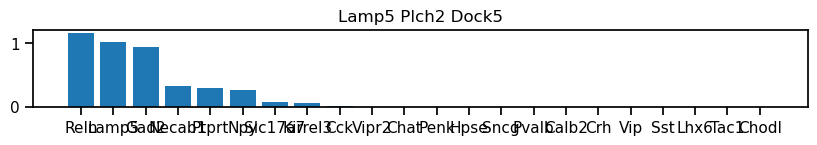

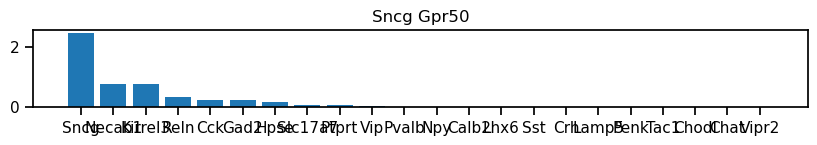

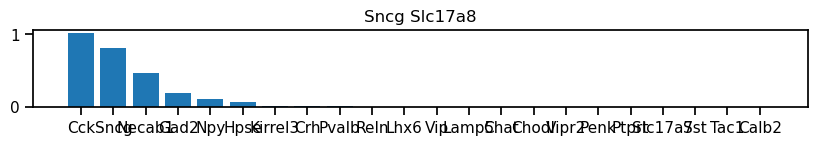

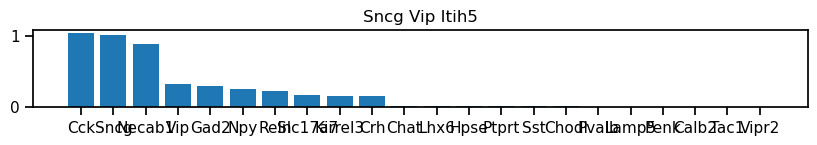

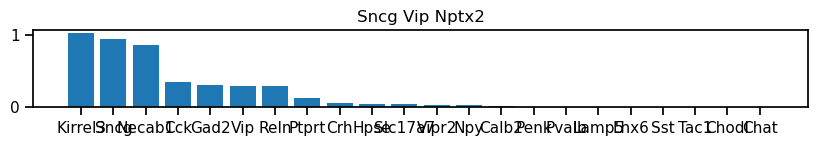

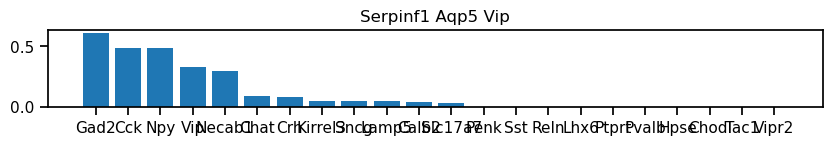

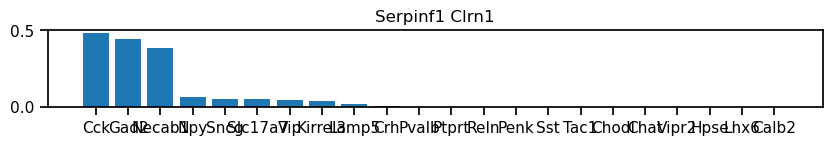

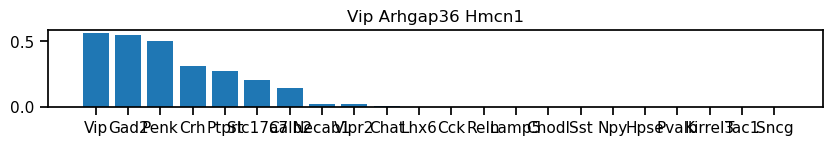

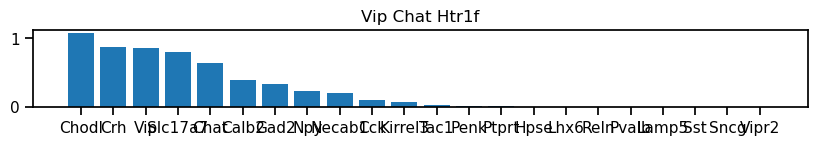

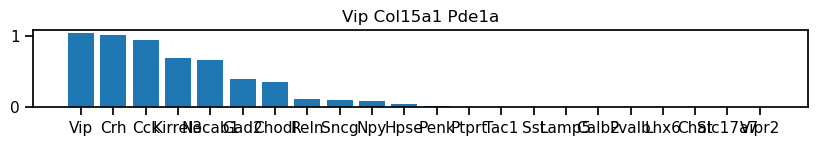

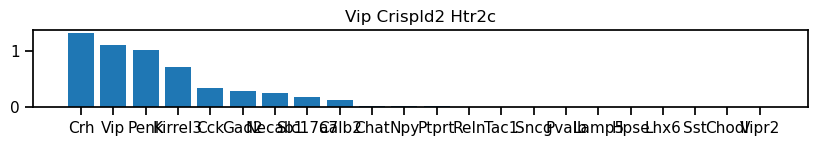

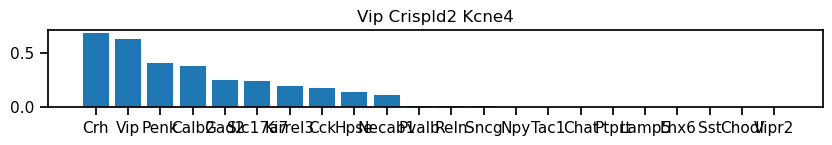

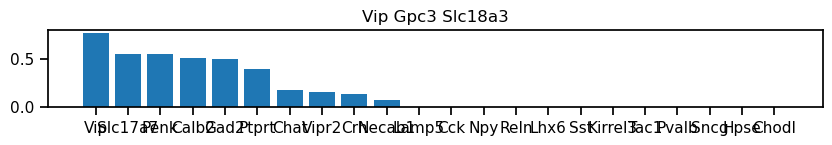

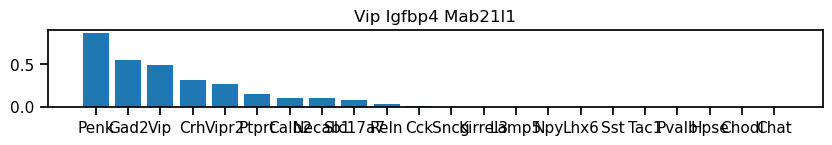

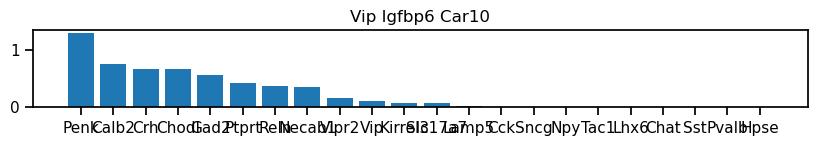

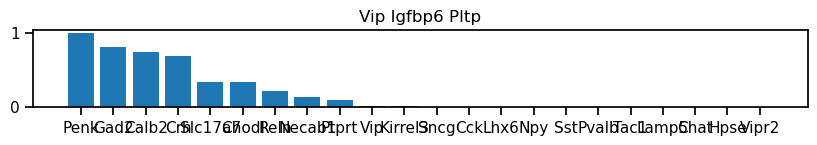

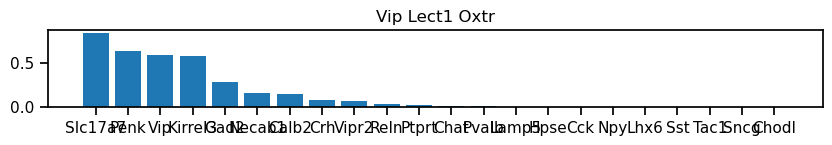

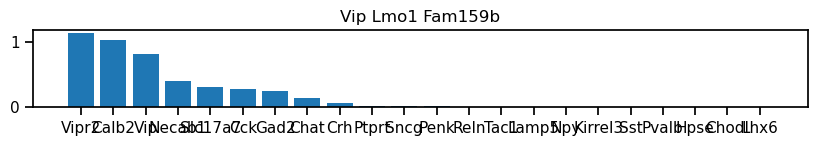

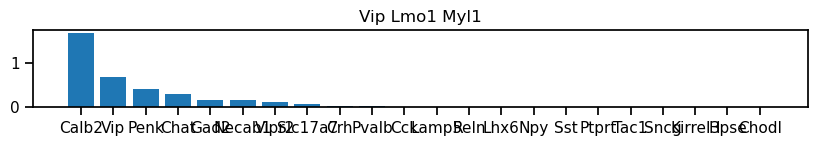

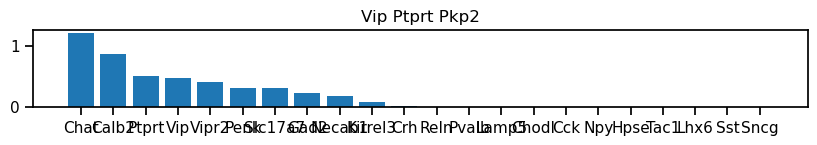

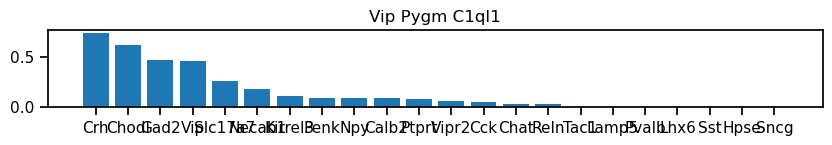

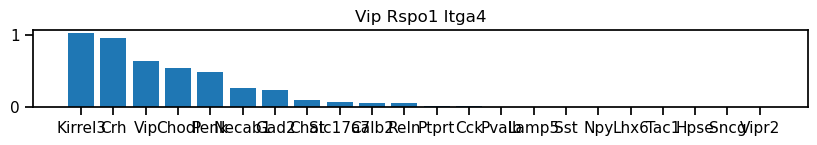

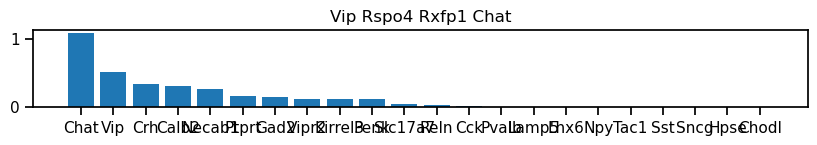

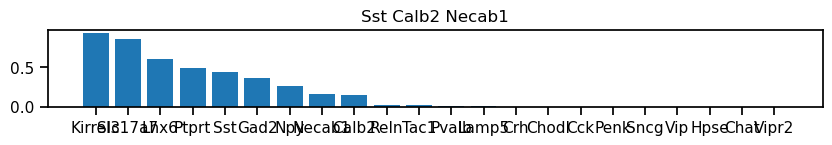

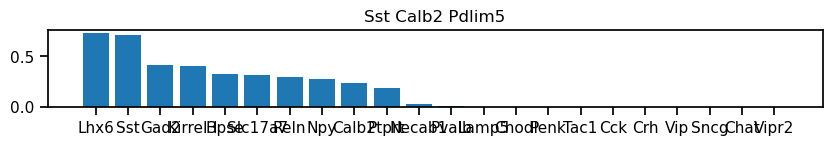

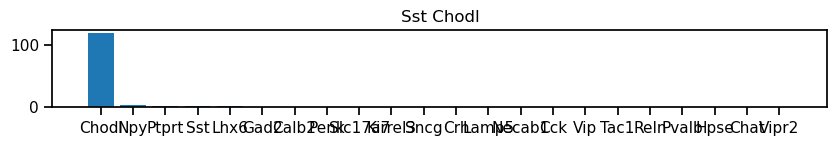

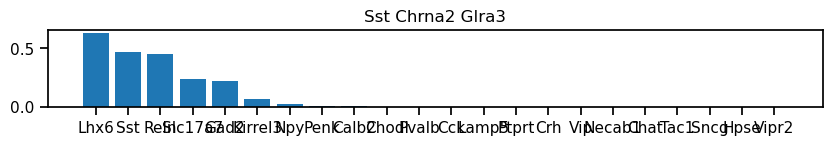

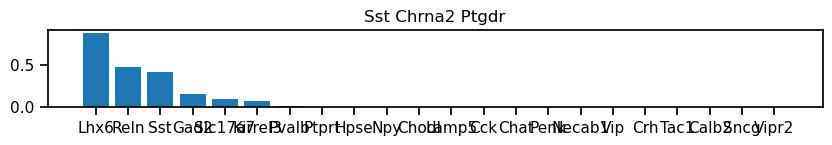

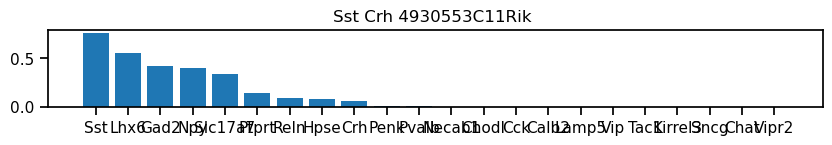

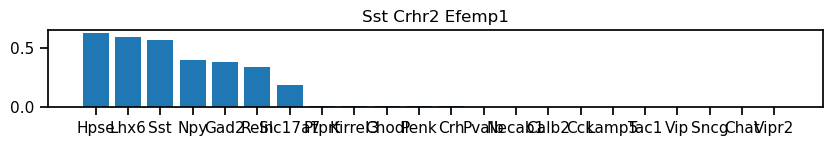

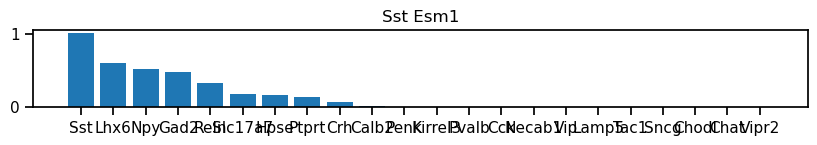

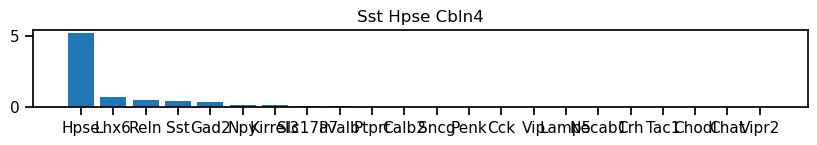

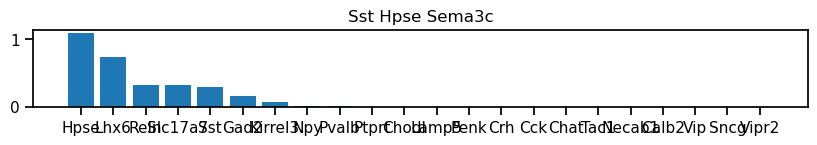

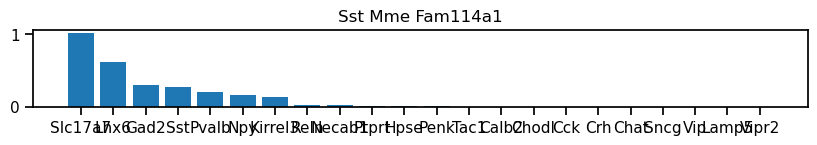

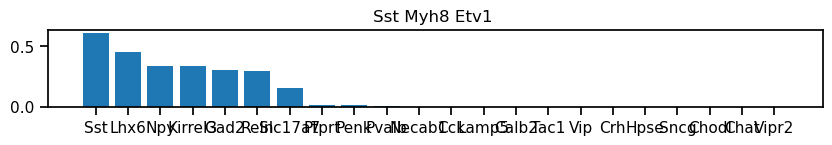

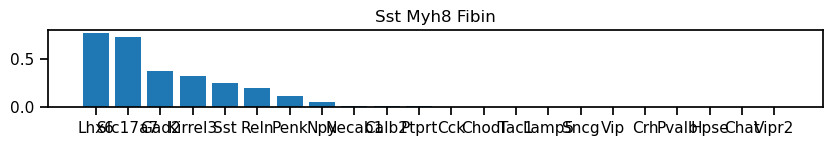

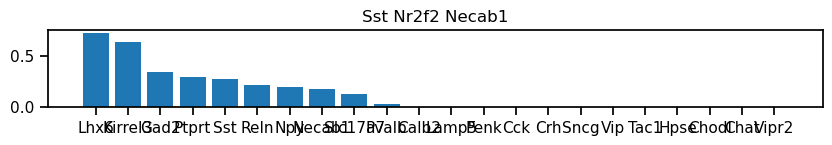

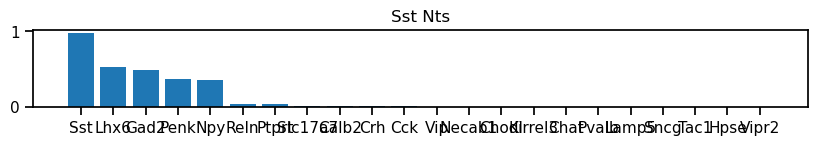

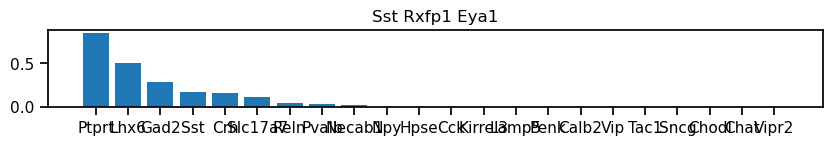

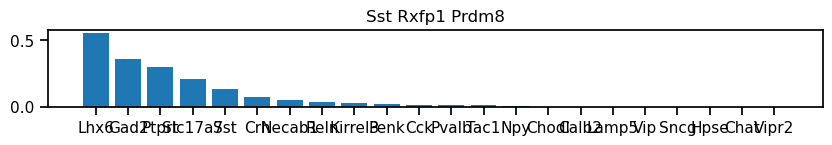

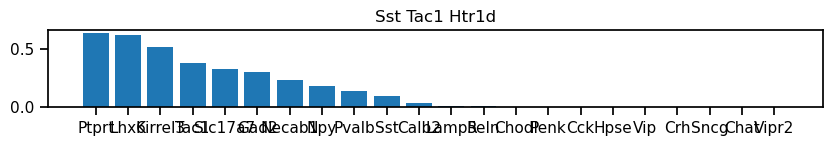

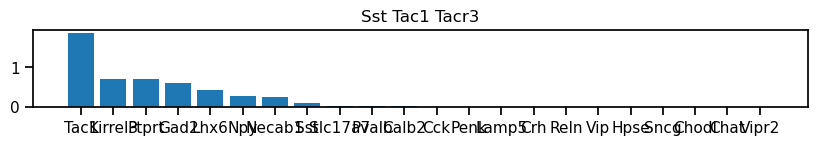

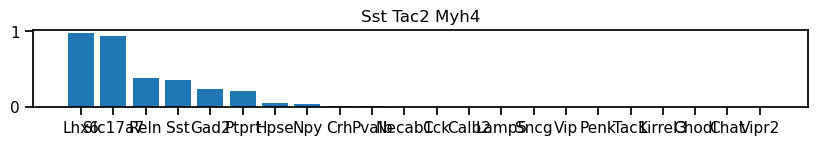

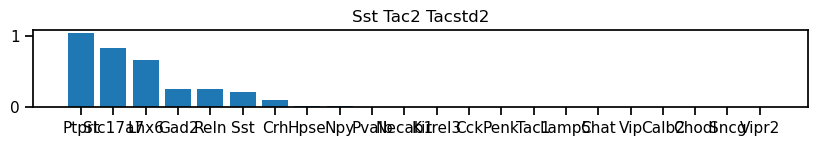

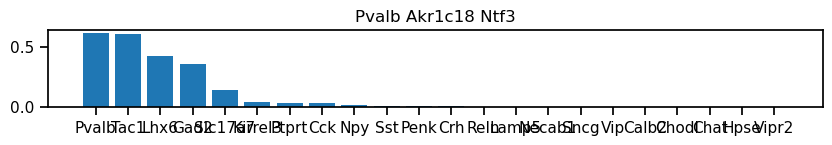

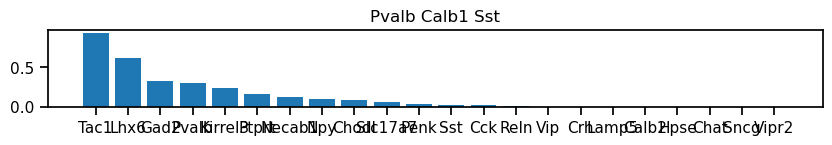

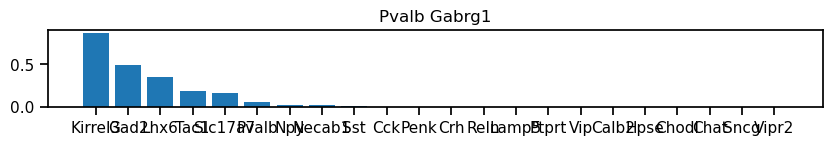

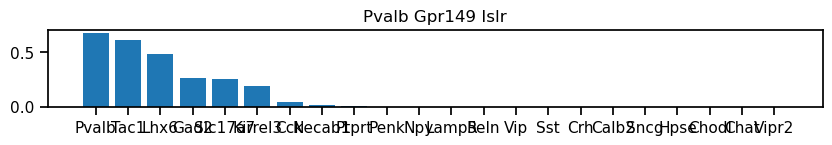

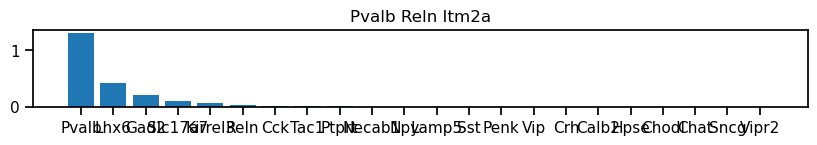

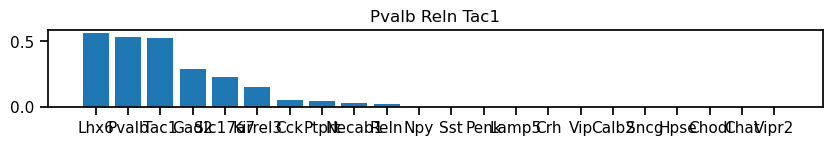

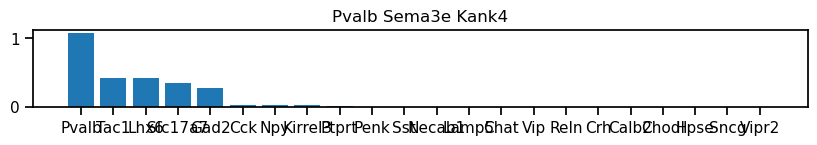

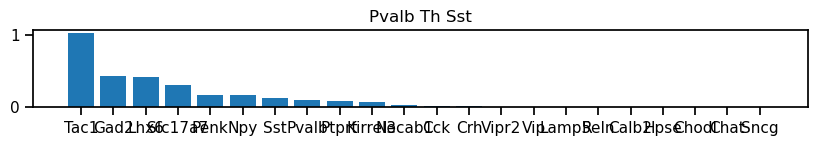

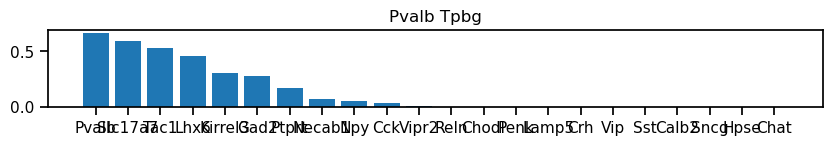

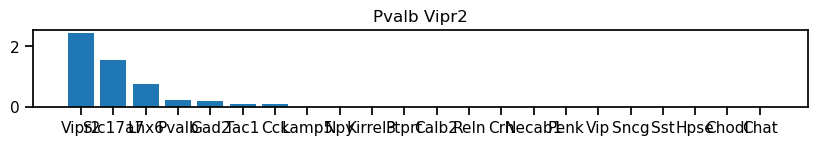

In [45]:
for cluster in clusters: 
    fig, ax = plt.subplots(figsize=(10,1))
    st_data = normalized.loc[cluster]
    sort_order = np.argsort(st_data.values)[::-1]
    sorted_genes = st_data.index[sort_order]
    sorted_values = st_data.values[sort_order]
    ax.bar(sorted_genes, sorted_values)
    ax.set_title(cluster)
        

Why is the normalized cpm so different than the absolute values?

### quantify average expression levels per cell subclass instead of at the cluster level

In [46]:
# get subclass and class labels for each cluster
cluster_metadata = cells[['class', 'subclass', 'cluster', 'order']].drop_duplicates()
cluster_metadata.head()

class subclass                cluster  order
0    GABAergic    Lamp5     Lamp5 Fam19a1 Pax6      0
43   GABAergic    Lamp5  Lamp5 Fam19a1 Tmem182      0
89   GABAergic    Lamp5            Lamp5 Krt73      0
130  GABAergic    Lamp5             Lamp5 Lhx6      0
176  GABAergic    Lamp5             Lamp5 Lsp1      0

In [47]:
# merge cell class and subclass metadata into mean normalized expression table and set as index
mean_expression_data = normalized.merge(cluster_metadata, on=['cluster', 'order'])
mean_expression_data = mean_expression_data.set_index(['class', 'subclass', 'cluster', 'order'])
mean_expression_data.columns.names = ['gene_symbol']
mean_expression_data.head()

KeyError: 'order'

In [ ]:
# reformat to long form df - one row per cluster per gene
norm_data = mean_expression_data.reset_index().melt(id_vars=['class', 'subclass', 'cluster', 'order'], var_name='gene_symbol', value_name='normalized_cpm')
# add receptor type
norm_data = norm_data.merge(neuromod_receptor_genes[['gene_symbol', 'receptor_type']], on='gene_symbol')
norm_data

class subclass               cluster  order gene_symbol  \
0     Glutamatergic  L2/3 IT       L2/3 IT ALM Sla      0      Adra1a   
1     Glutamatergic  L2/3 IT  L2/3 IT VISp Adamts2      0      Adra1a   
2     Glutamatergic  L2/3 IT    L2/3 IT VISp Agmat      0      Adra1a   
3     Glutamatergic  L2/3 IT     L2/3 IT VISp Rrad      0      Adra1a   
4     Glutamatergic    L5 IT  L5 IT ALM Cpa6 Gpr88      1      Adra1a   
...             ...      ...                   ...    ...         ...   
4945      GABAergic    Pvalb       Pvalb Reln Tac1     12        Htr7   
4946      GABAergic    Pvalb    Pvalb Sema3e Kank4     12        Htr7   
4947      GABAergic    Pvalb          Pvalb Th Sst     12        Htr7   
4948      GABAergic    Pvalb            Pvalb Tpbg     12        Htr7   
4949      GABAergic    Pvalb           Pvalb Vipr2     12        Htr7   

      normalized_cpm        receptor_type  
0           0.000000           adrenergic  
1           0.001801           adrenergic  
2           0.009446           adrenergic  
3           0.000158           adrenergic  
4           0.000000           adrenergic  
...              ...                  ...  
4945        0.081100  5-hydroxytryptamine  
4946        0.014649  5-hydroxytryptamine  
4947        0.035242  5-hydroxytryptamine  
4948        0.063232  5-hydroxytryptamine  
4949        0.183464  5-hydroxytryptamine  

[4950 rows x 7 columns]

/Users/marinag/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


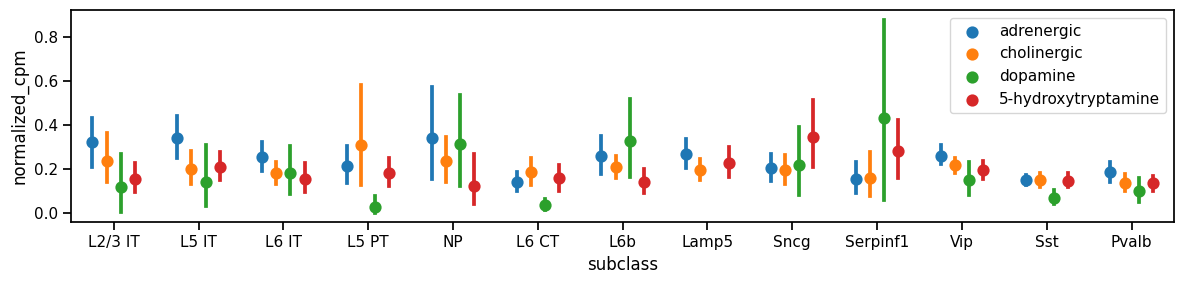

In [ ]:
# plot mean expression level for each receptor type for subclass

fig, ax = plt.subplots(figsize=(12,3))
ax= sns.pointplot(data=norm_data, x='subclass', y='normalized_cpm', hue='receptor_type', dodge=0.5, join=False, ax=ax)
ax.legend(bbox_to_anchor=(1,1))
fig.tight_layout();

/Users/marinag/anaconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/marinag/anaconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/marinag/anaconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/marinag/anaconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/marinag/anaconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/marinag/anaconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/Users/marinag/anaconda3/

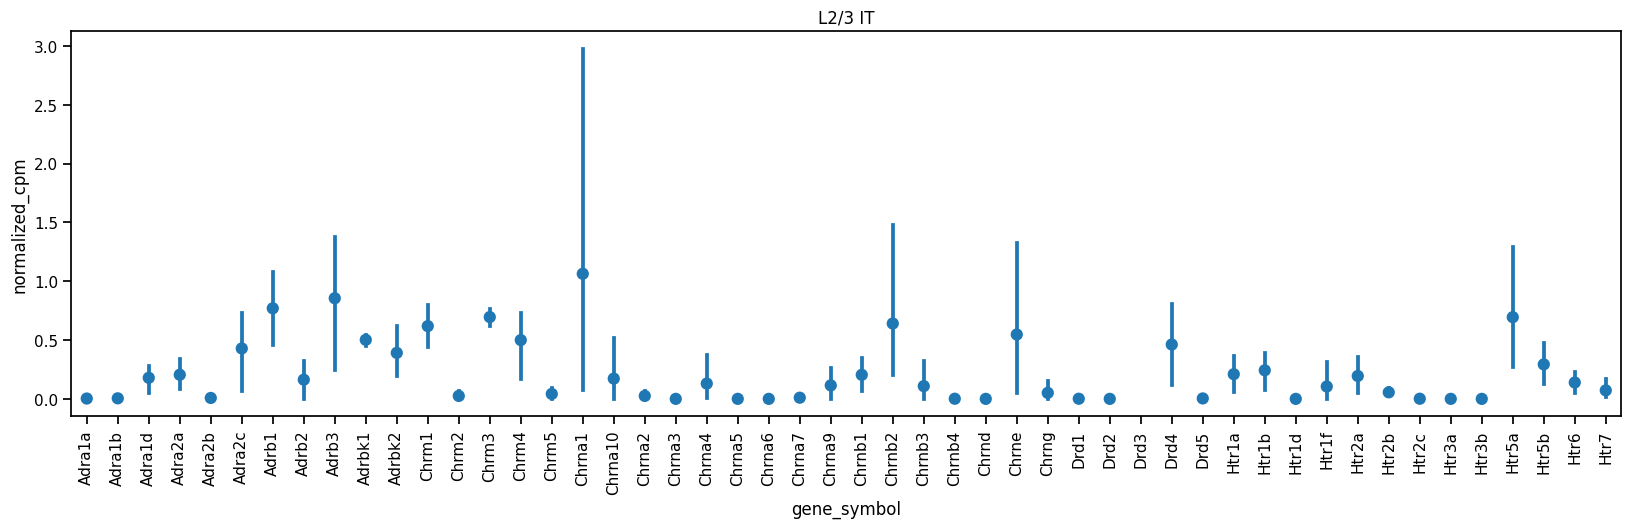

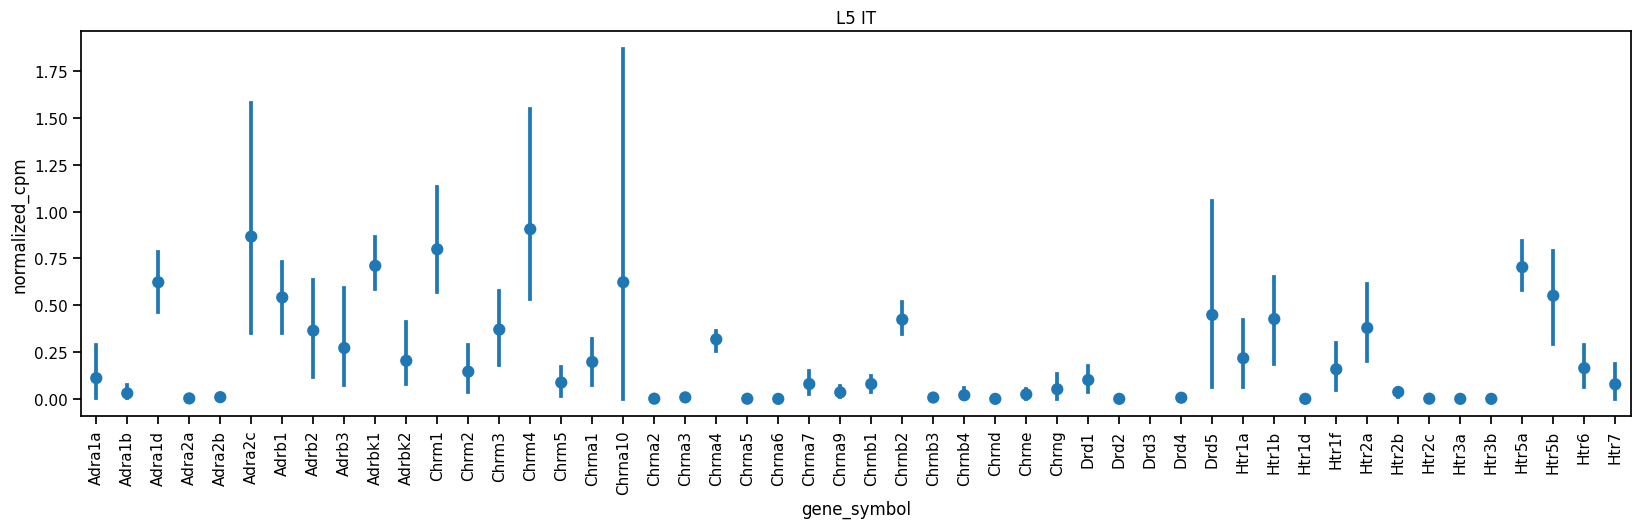

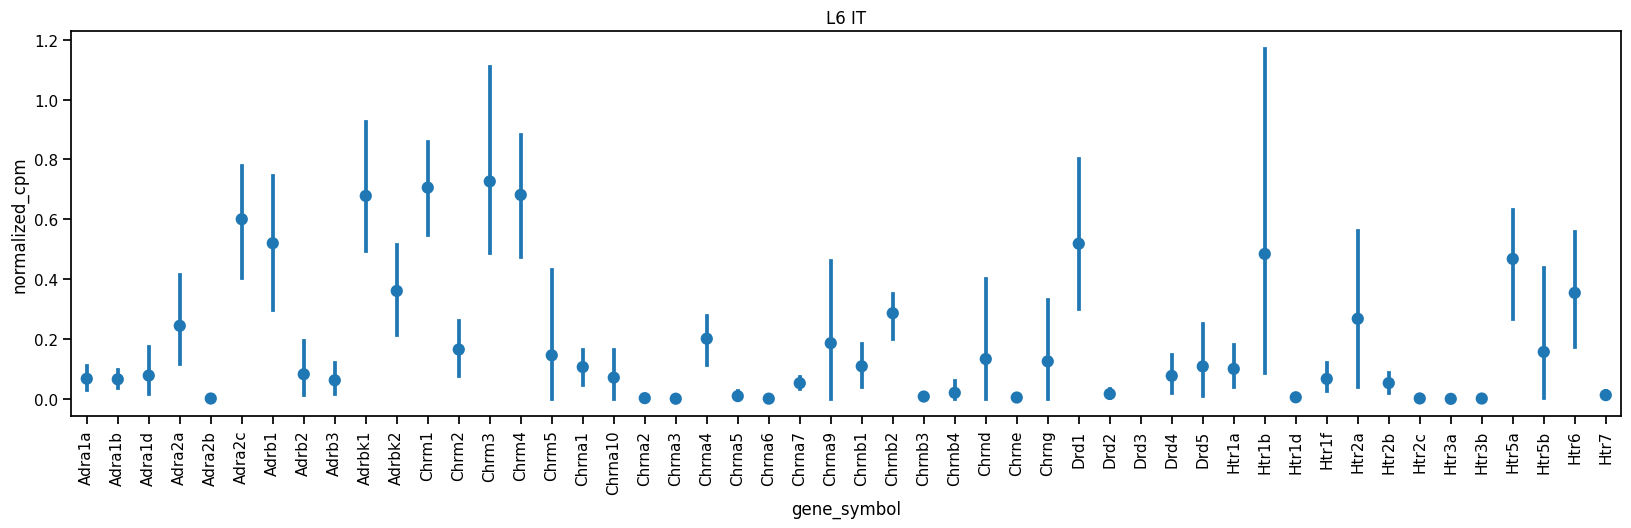

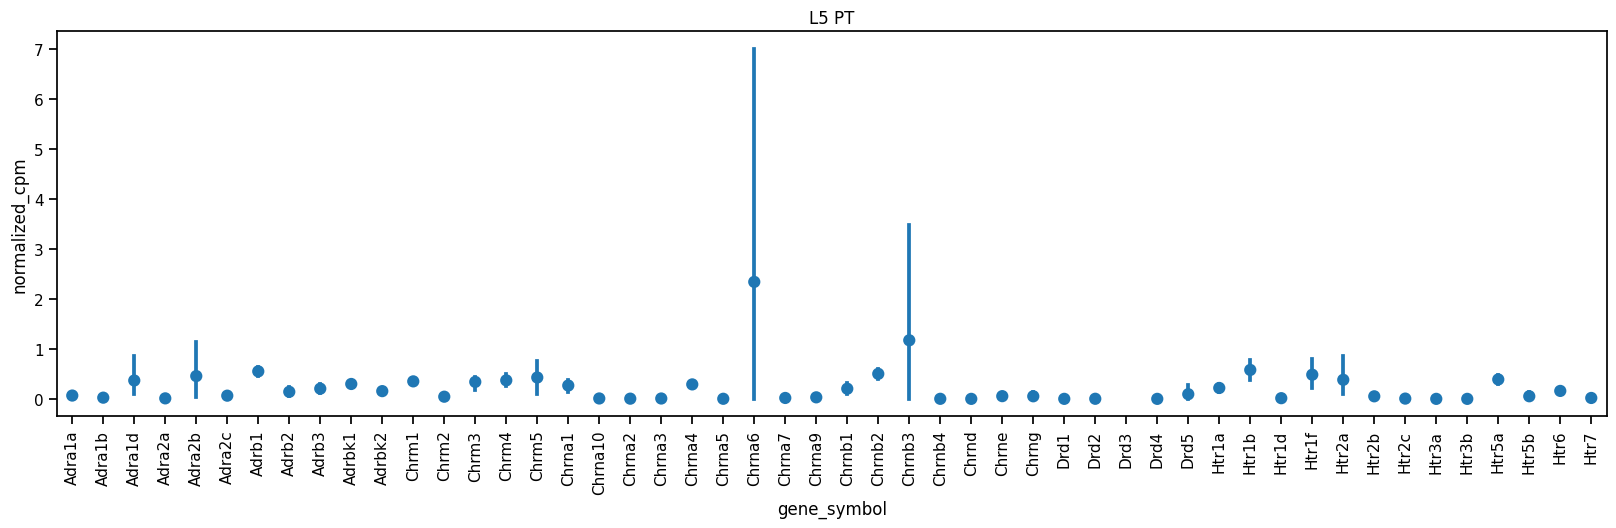

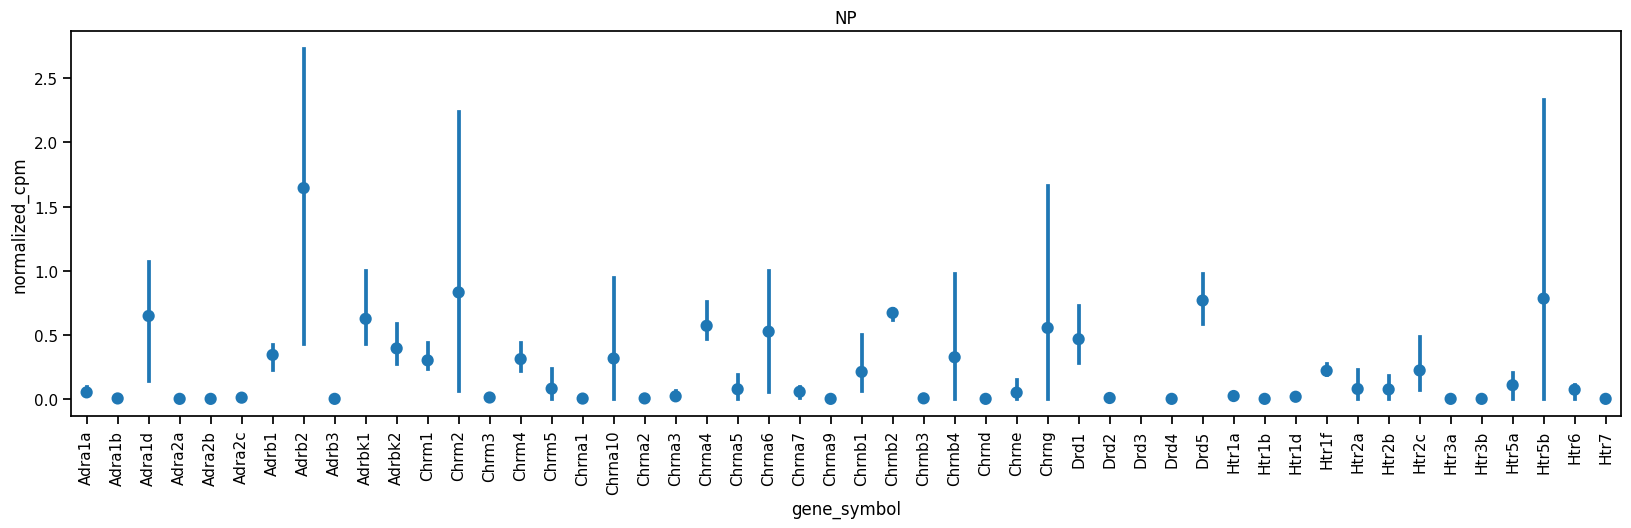

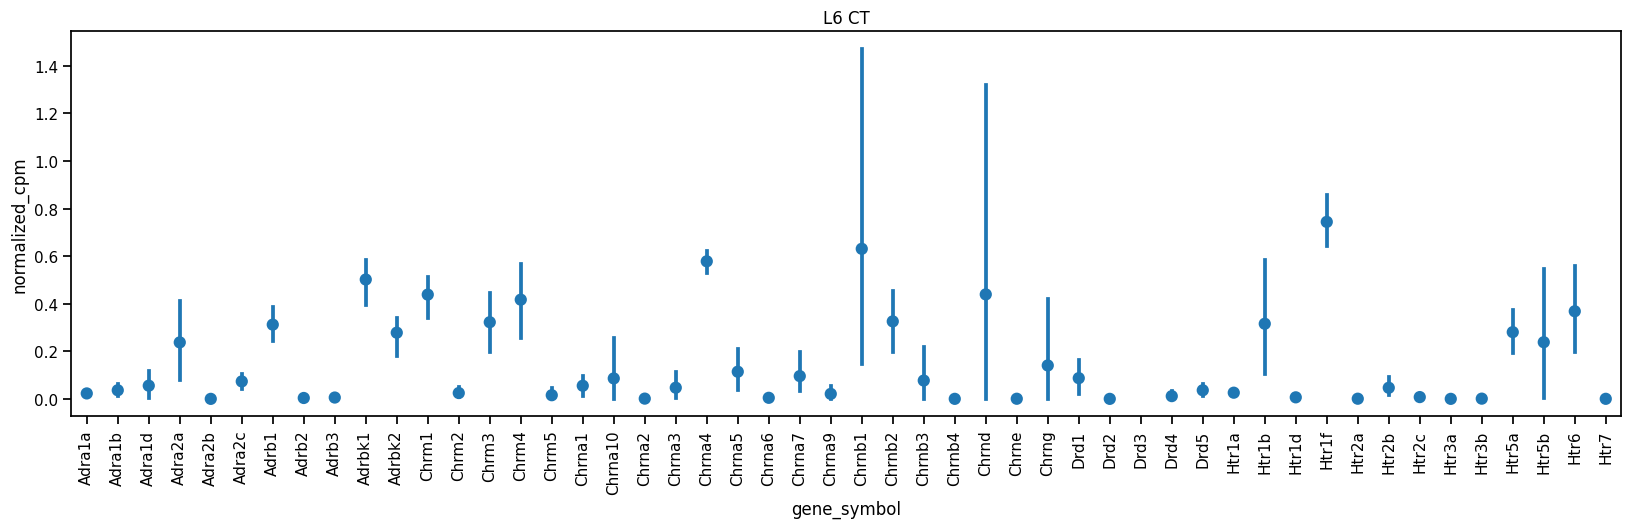

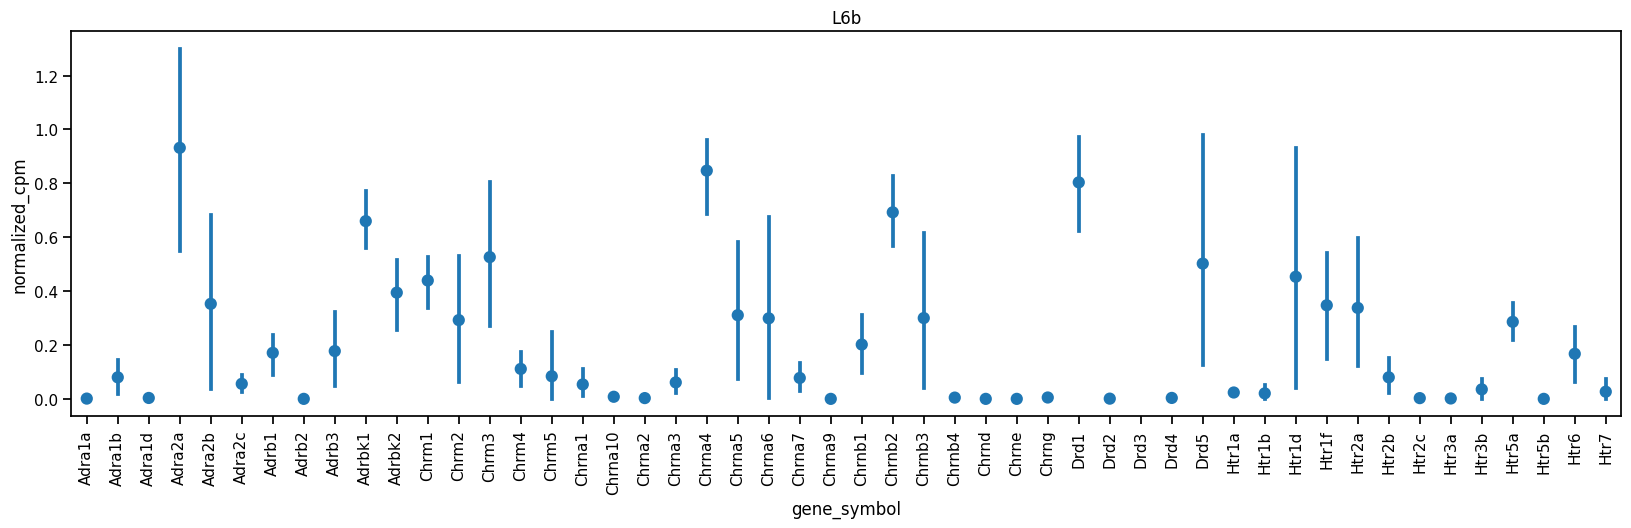

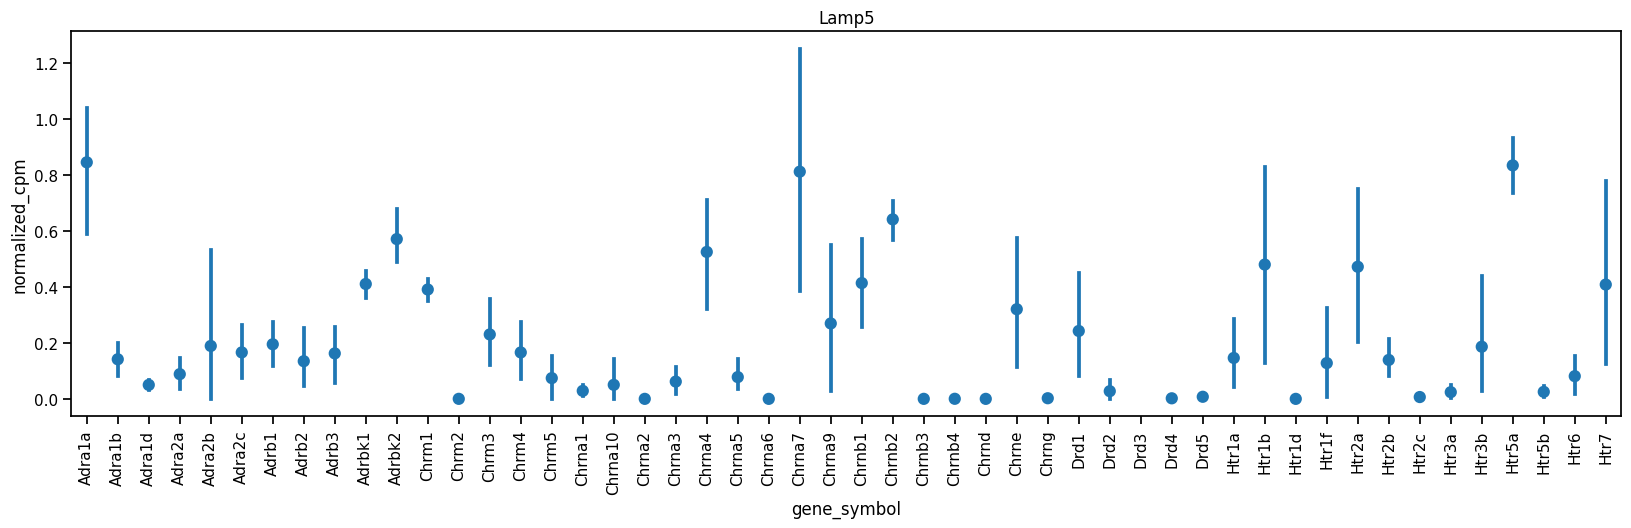

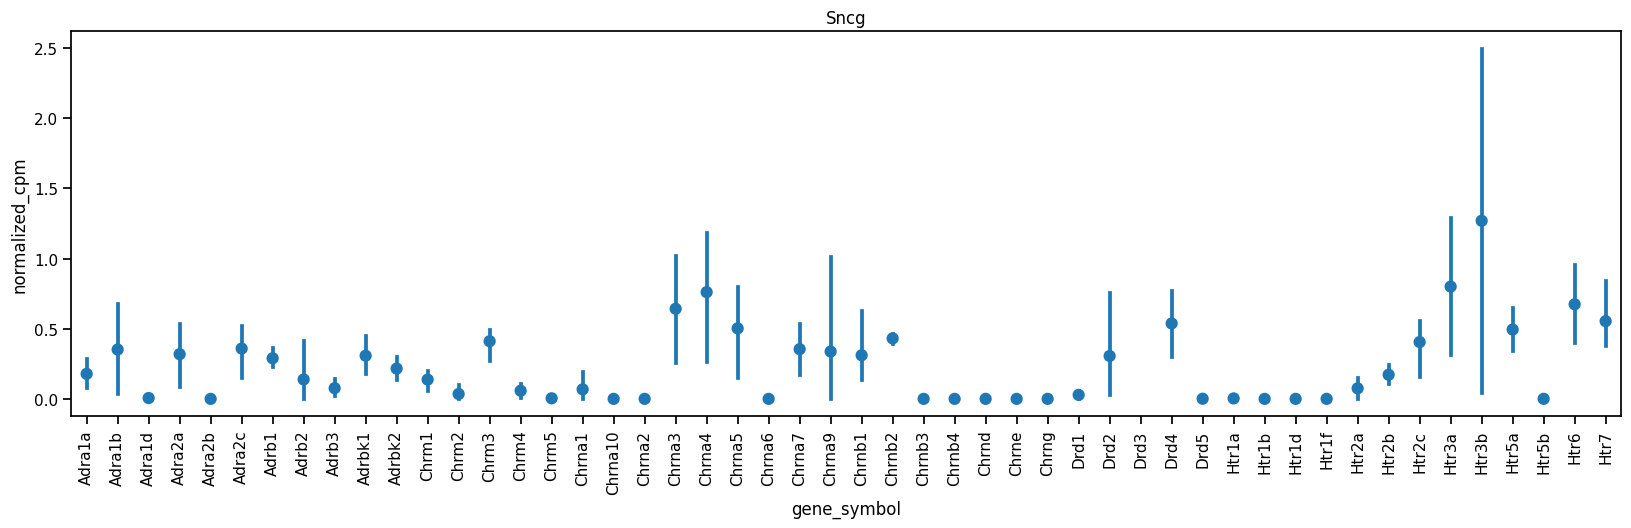

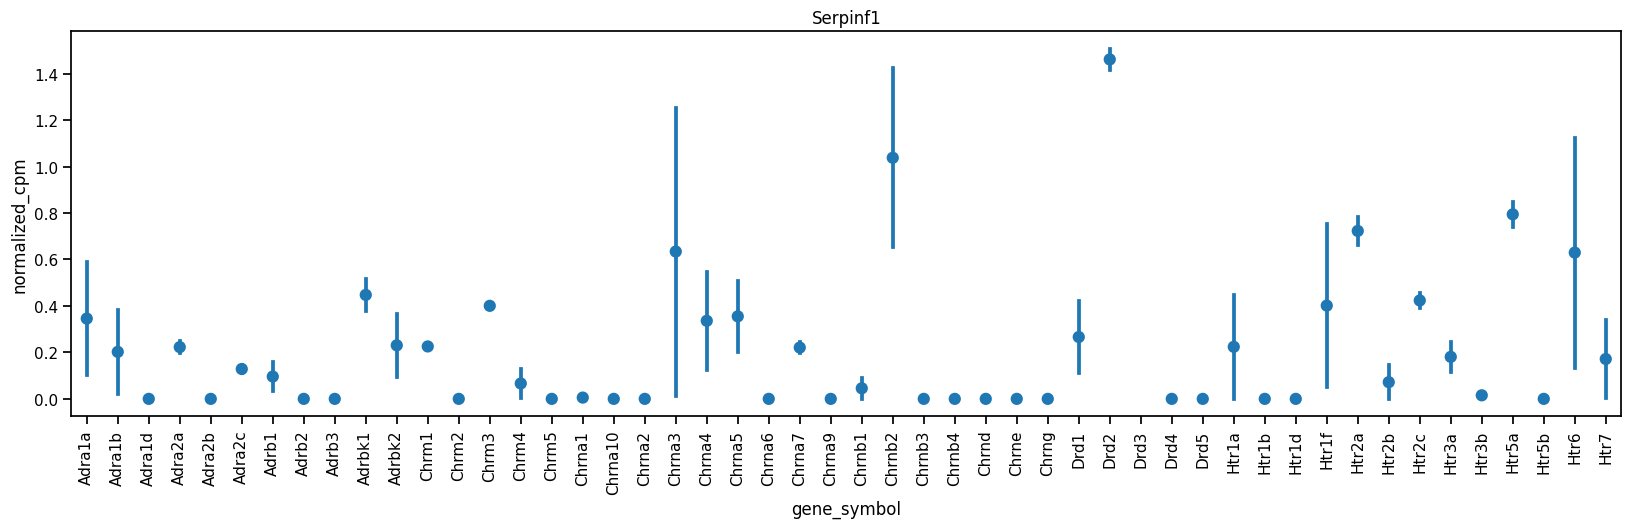

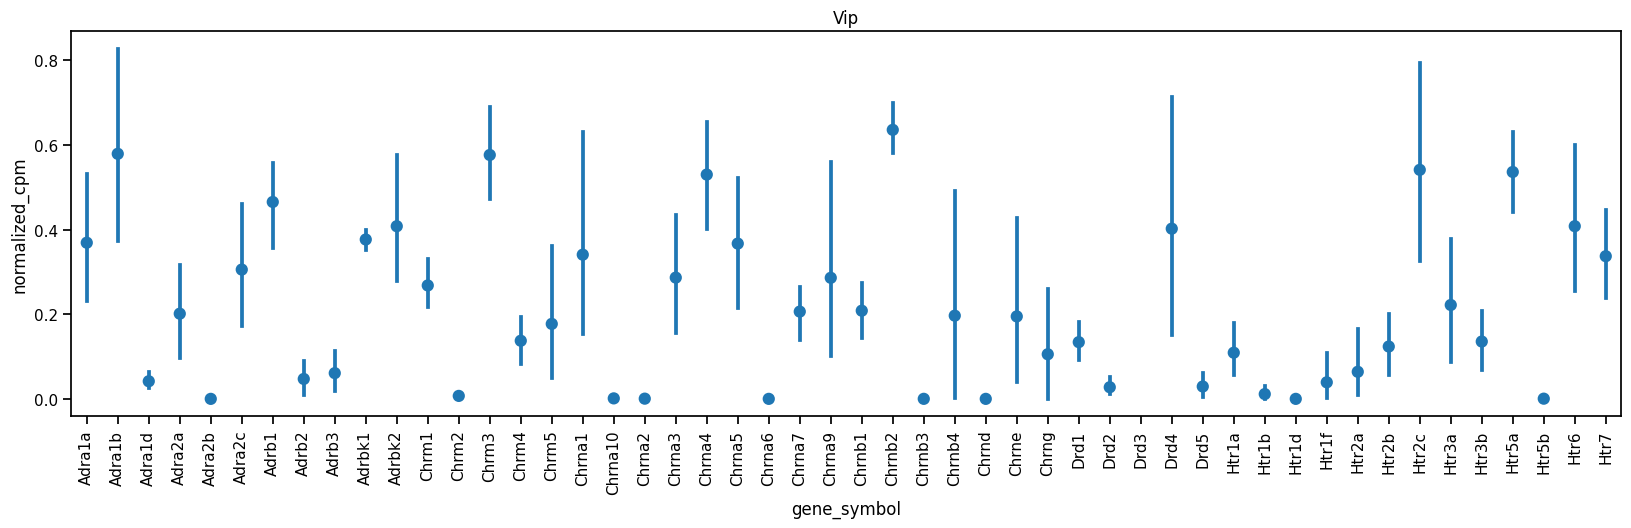

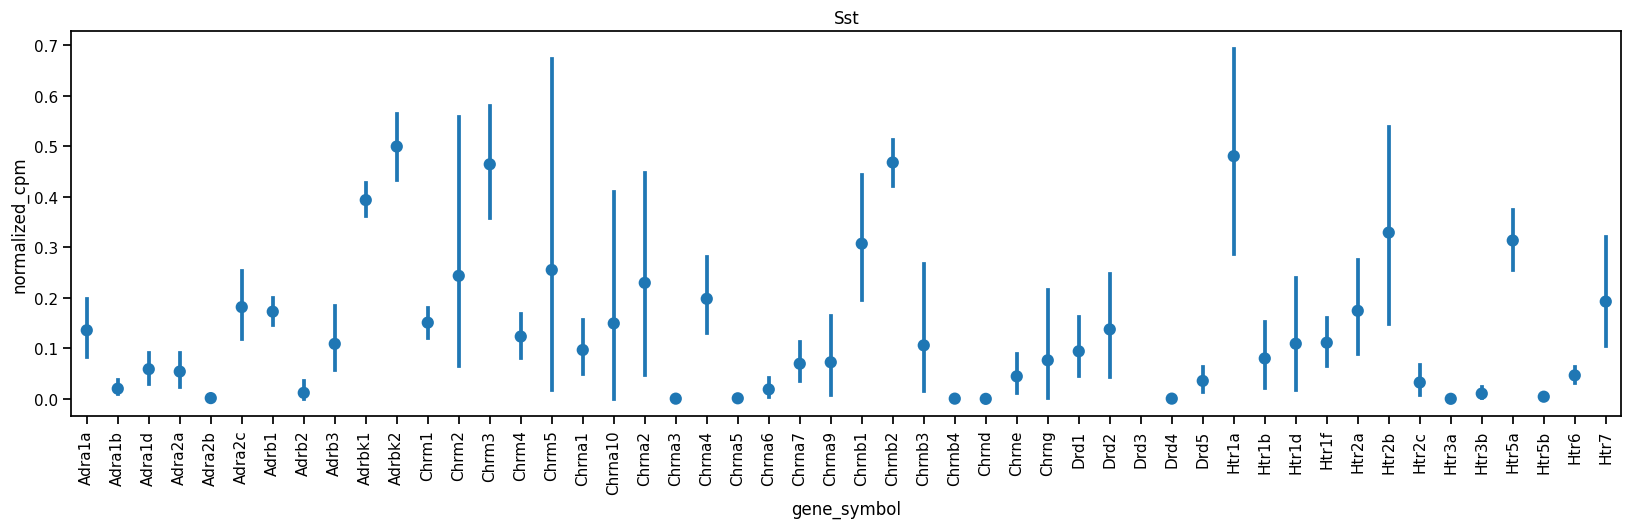

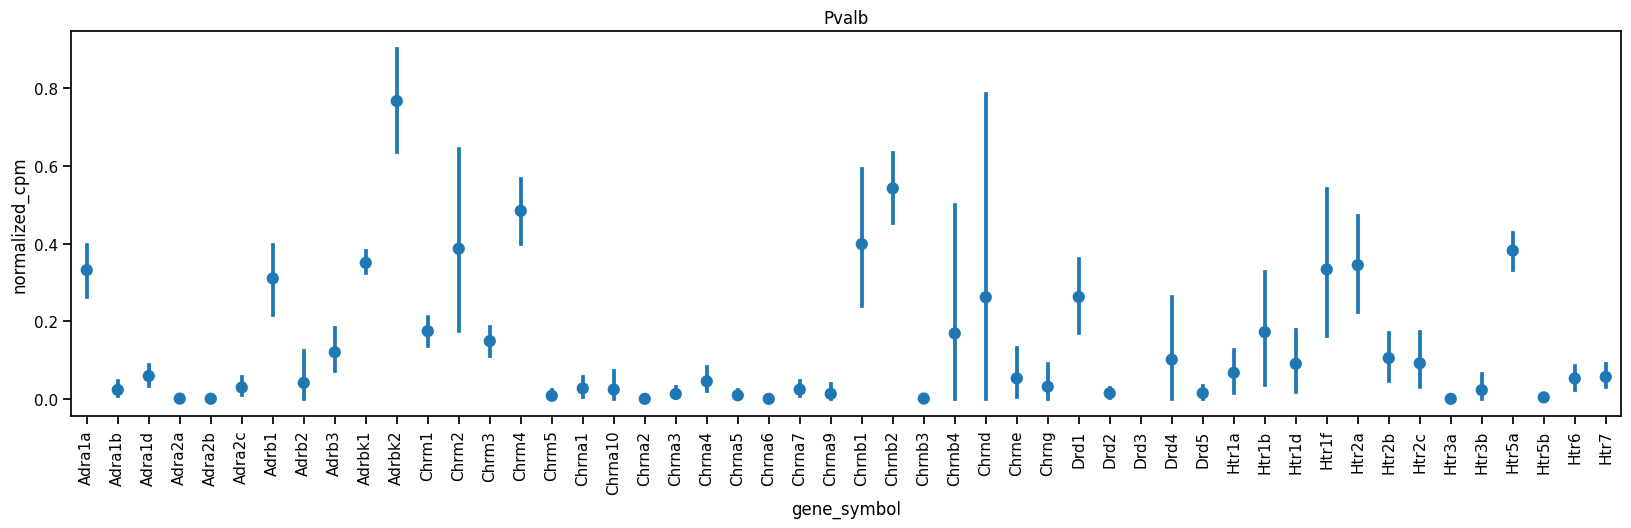

In [ ]:
# plot average expression level per gene for each subclass
hue_order = list(subclass_colors_dict.keys())
palette = list(subclass_colors_dict.values())

genes = norm_data.gene_symbol.unique()

for subclass in subclasses: 
    subclass_norm = norm_data[norm_data.subclass==subclass].copy()
    fig, ax = plt.subplots(figsize=(20,5))
    ax = sns.pointplot(data=subclass_norm, x='gene_symbol', y='normalized_cpm', 
                       join=False, order=genes, ax=ax)
    ax.set_title(subclass)
    ax.set_xticklabels(genes, rotation=90)

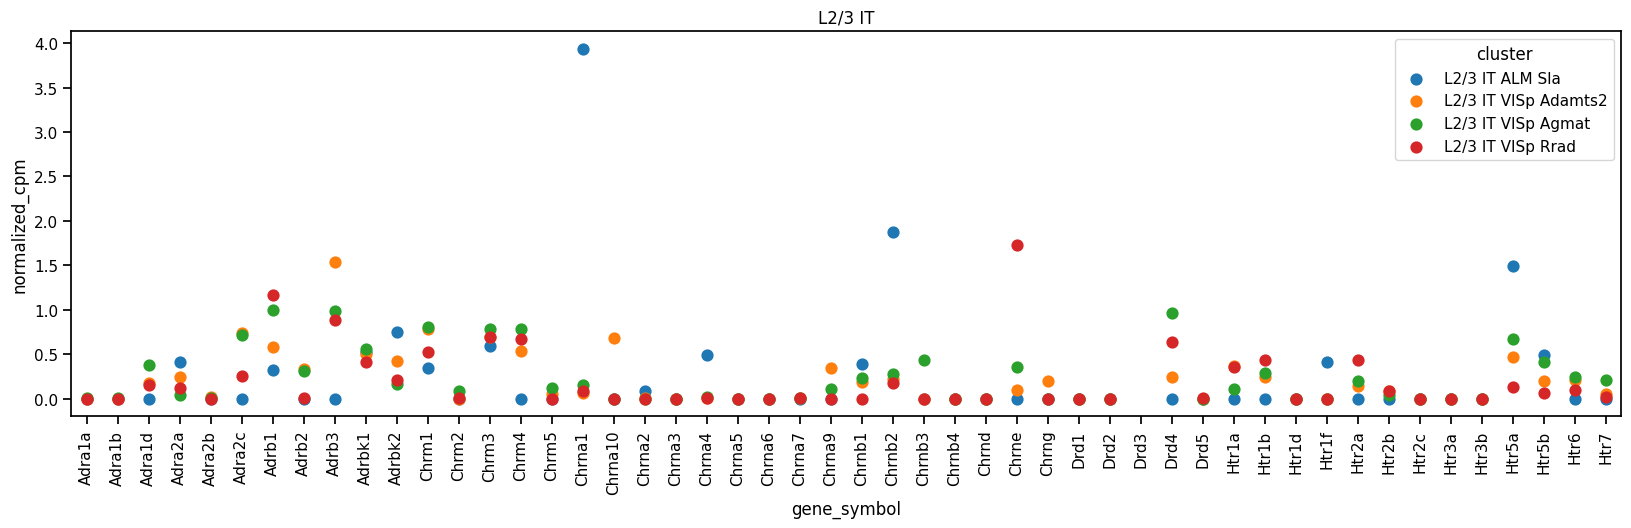

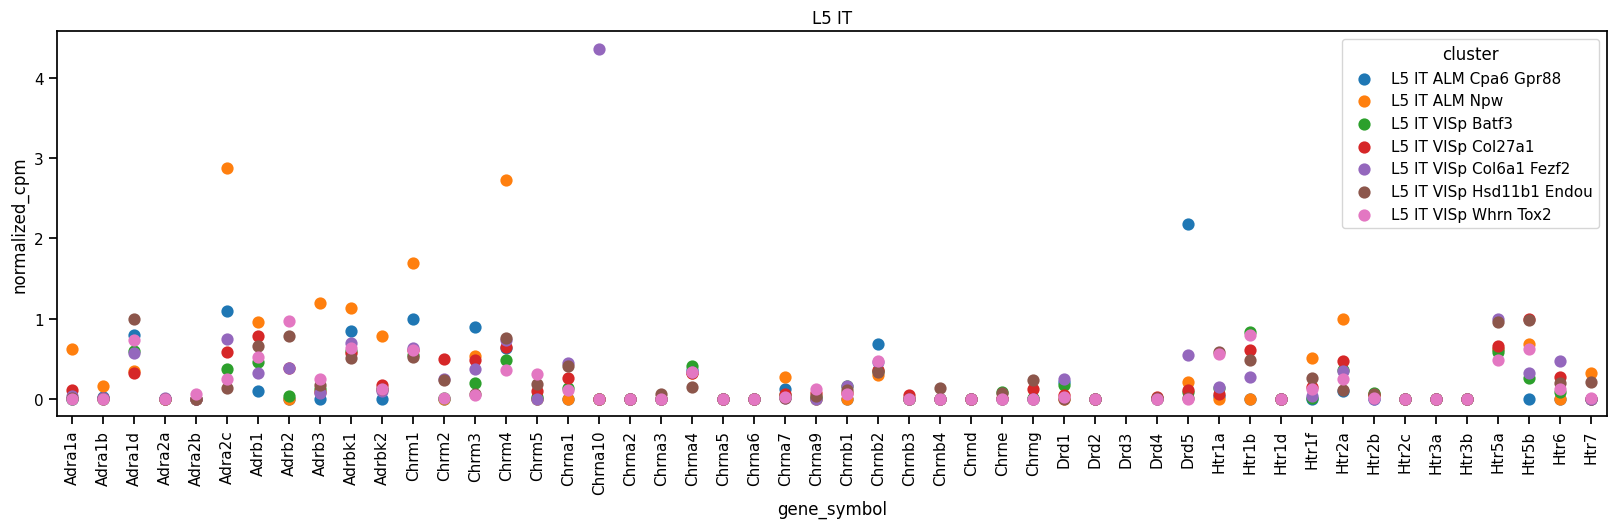

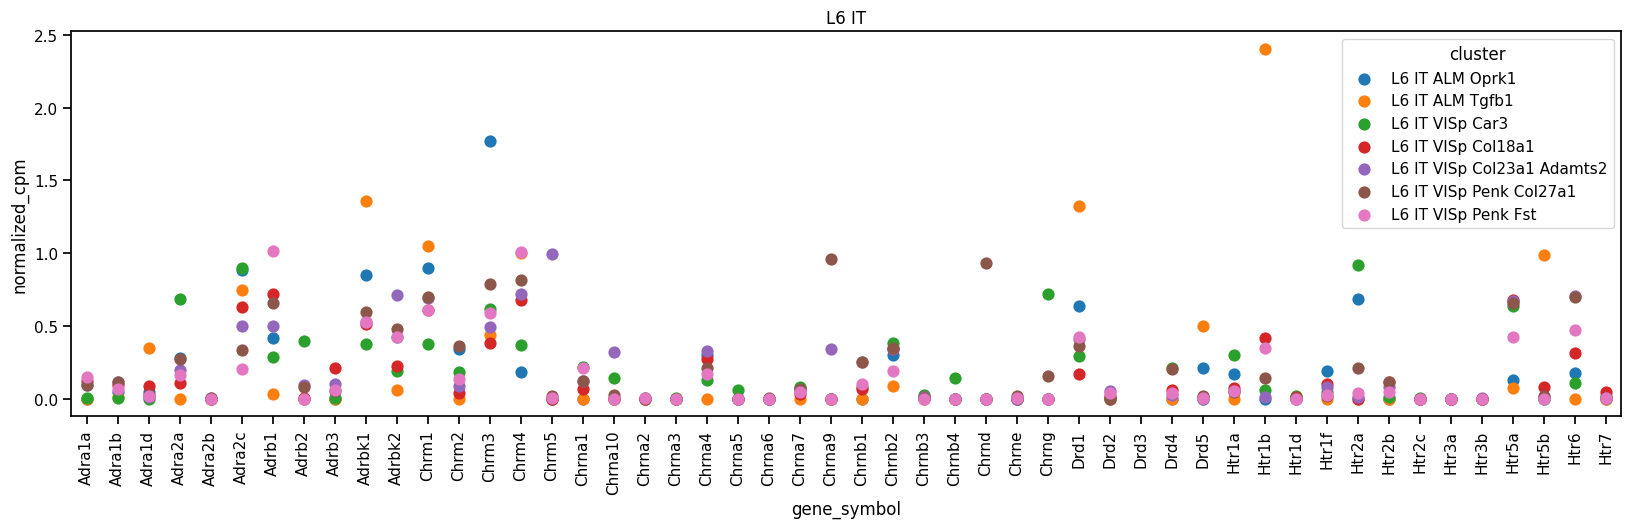

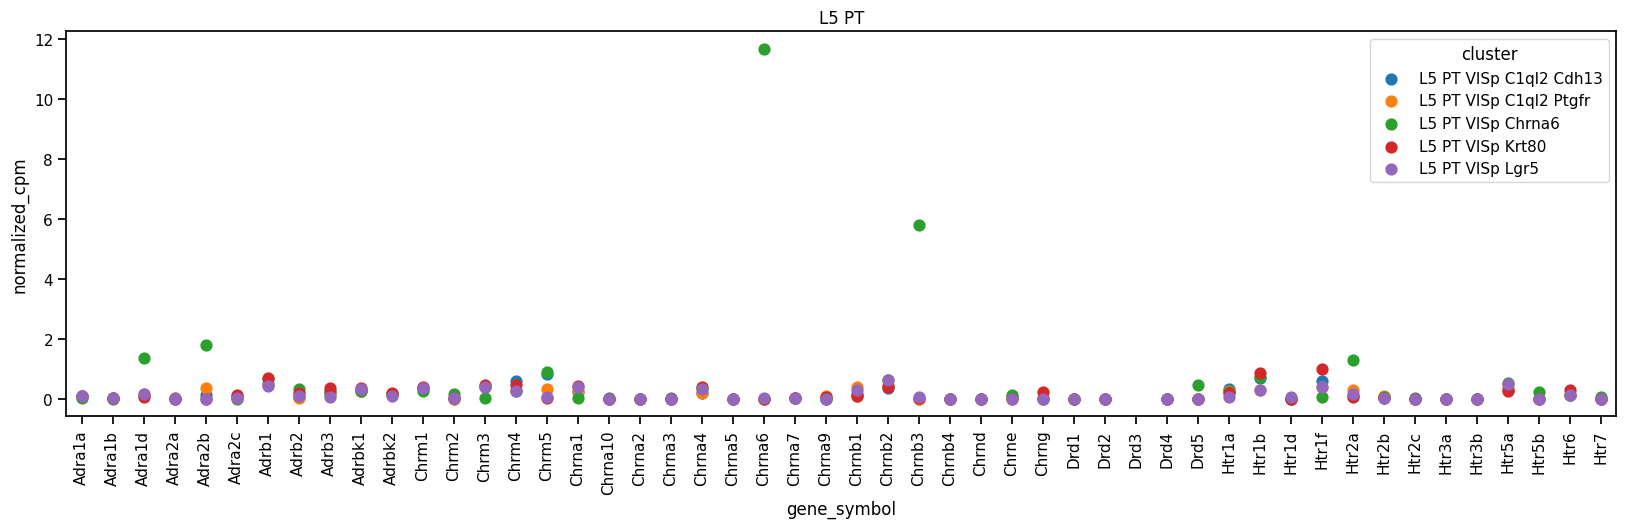

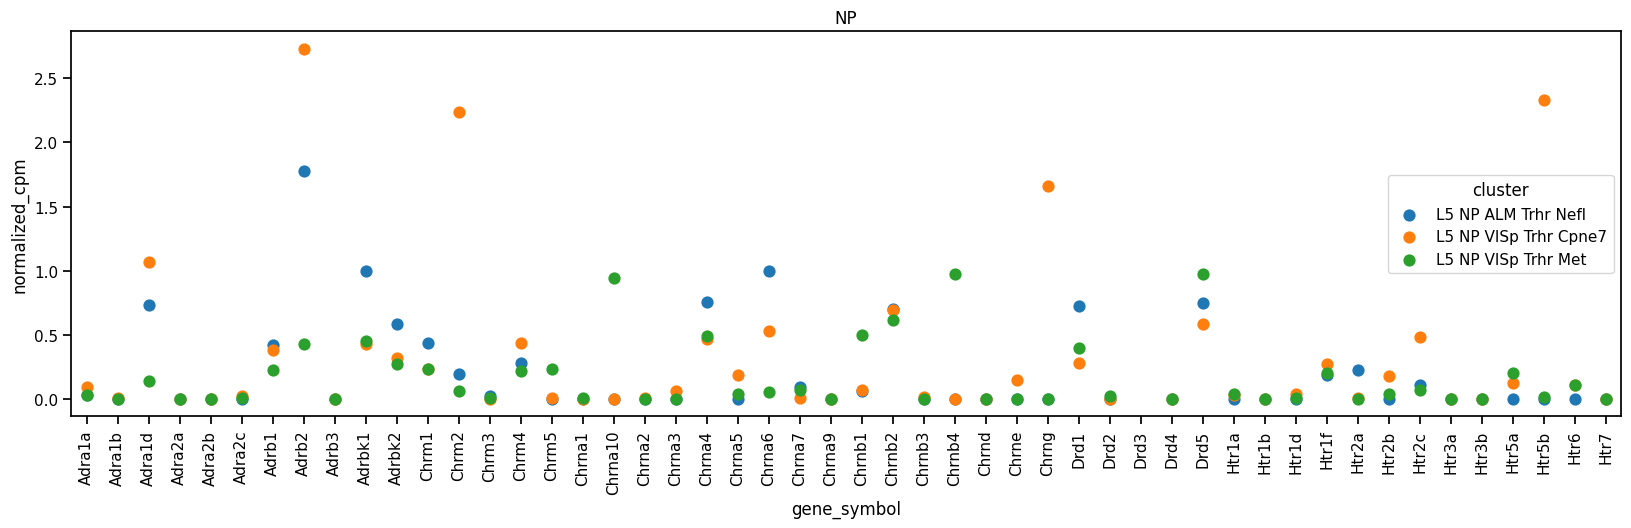

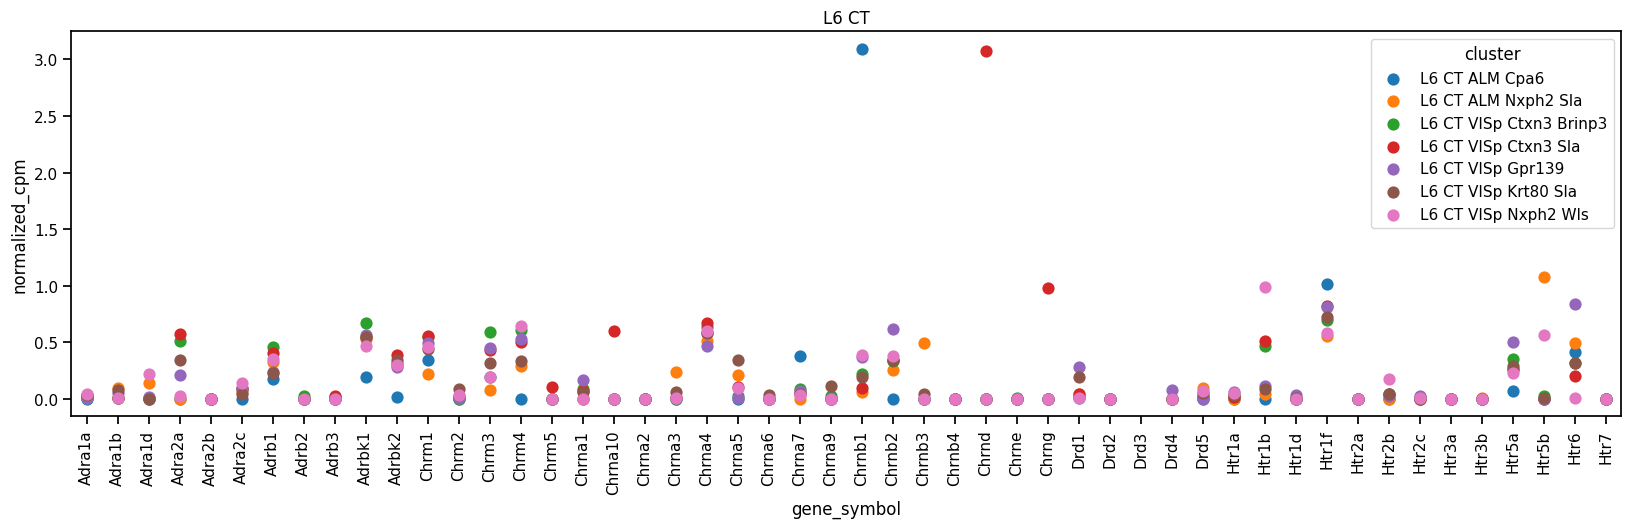

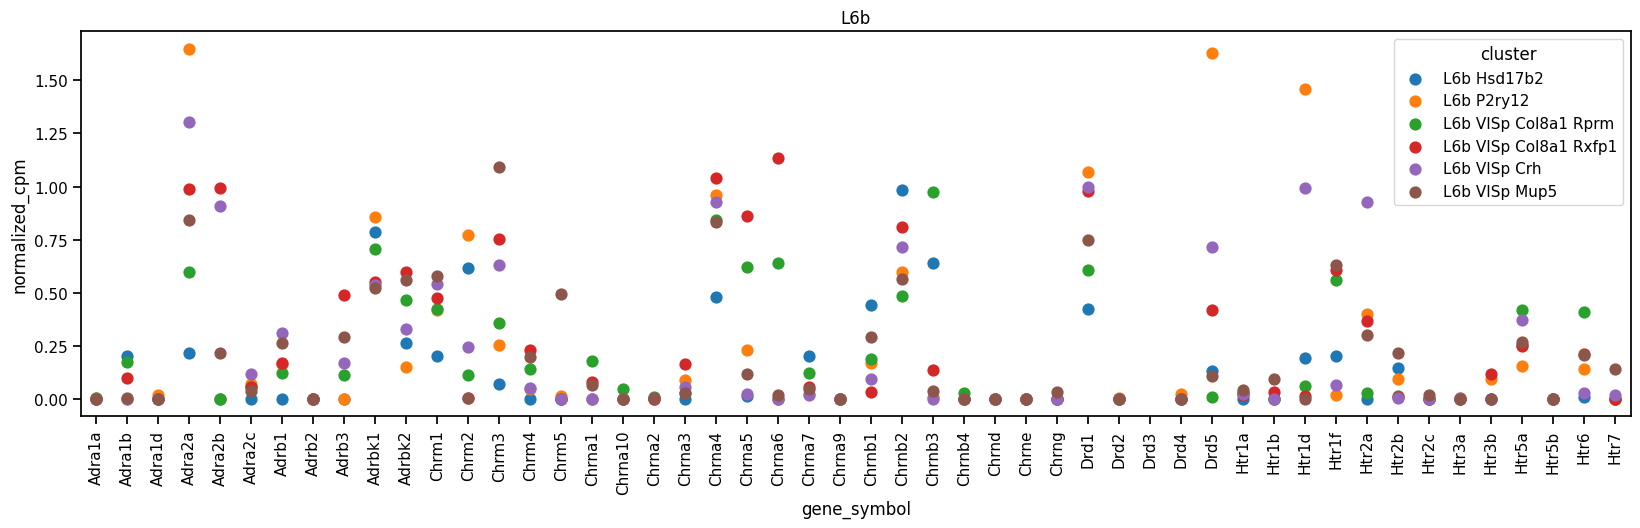

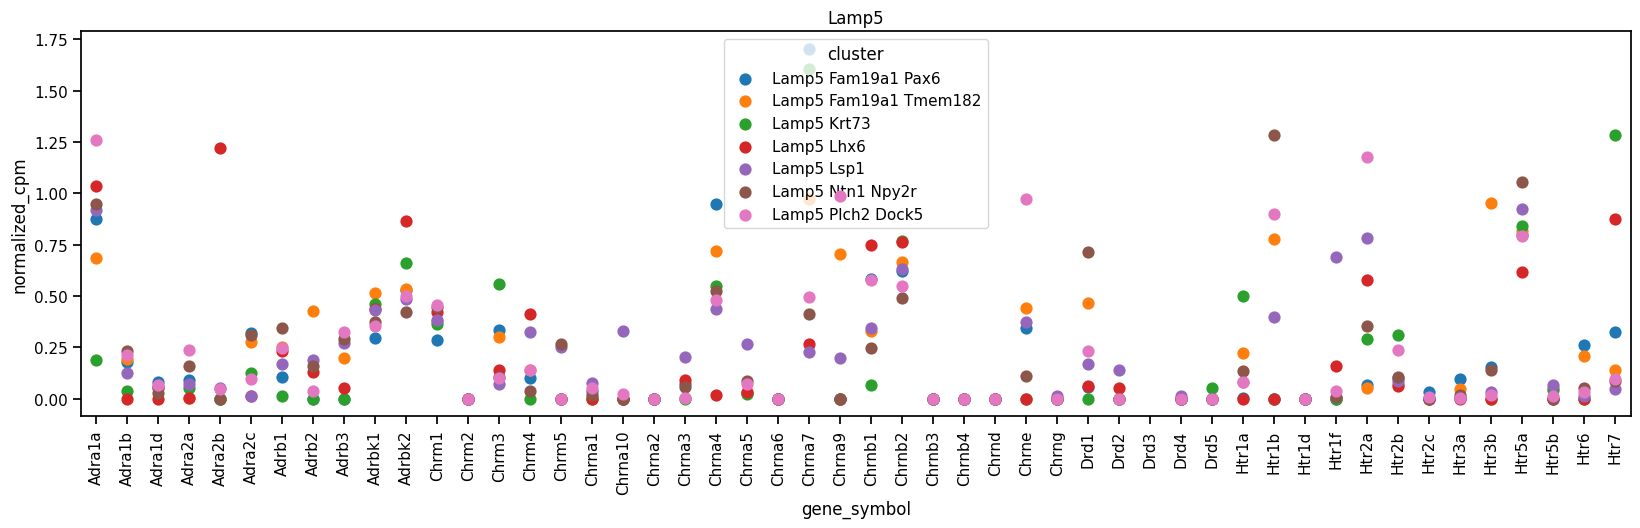

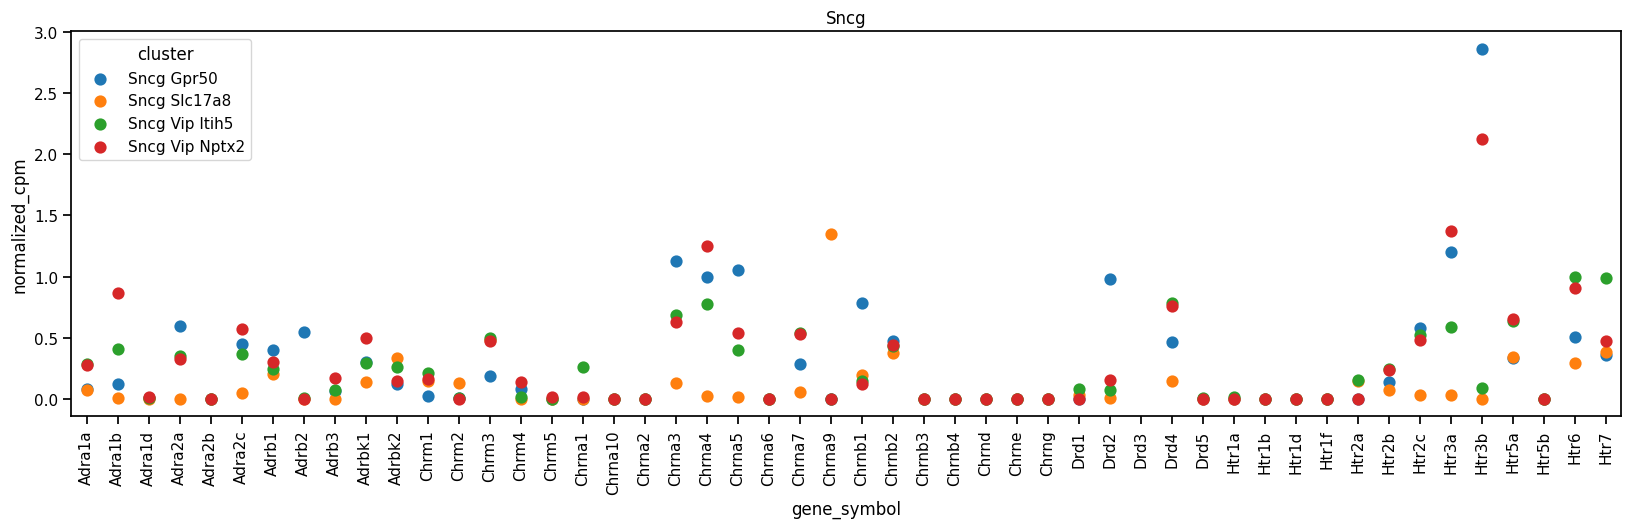

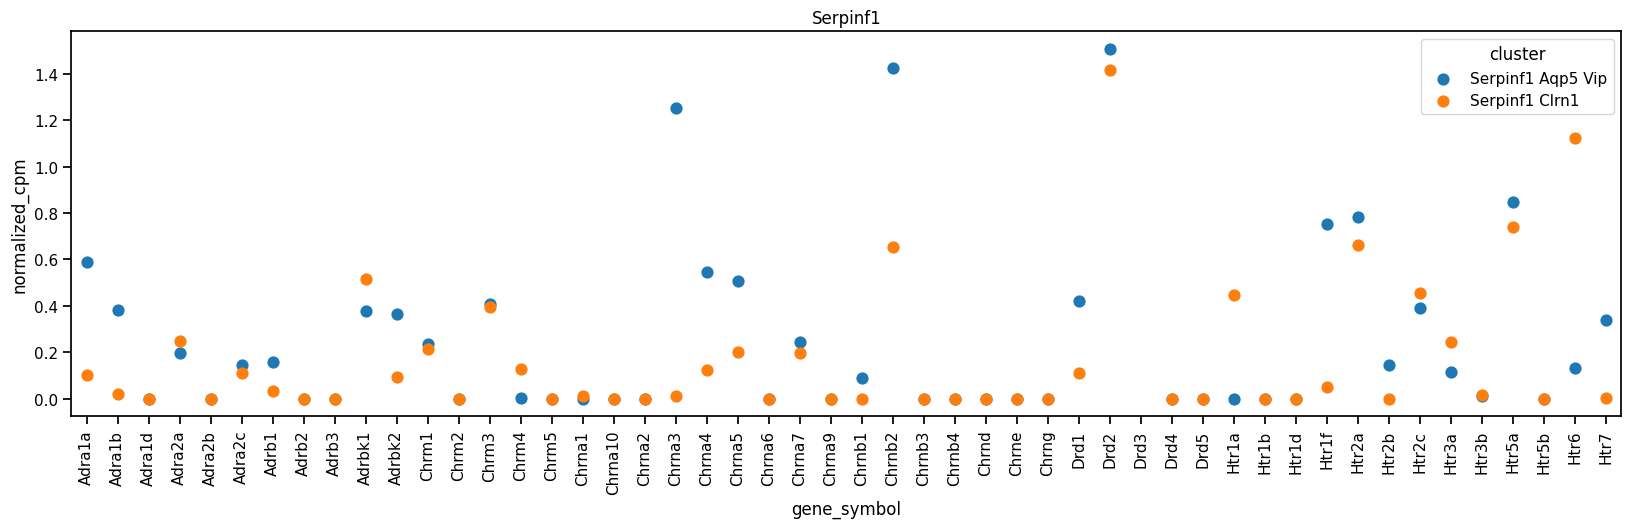

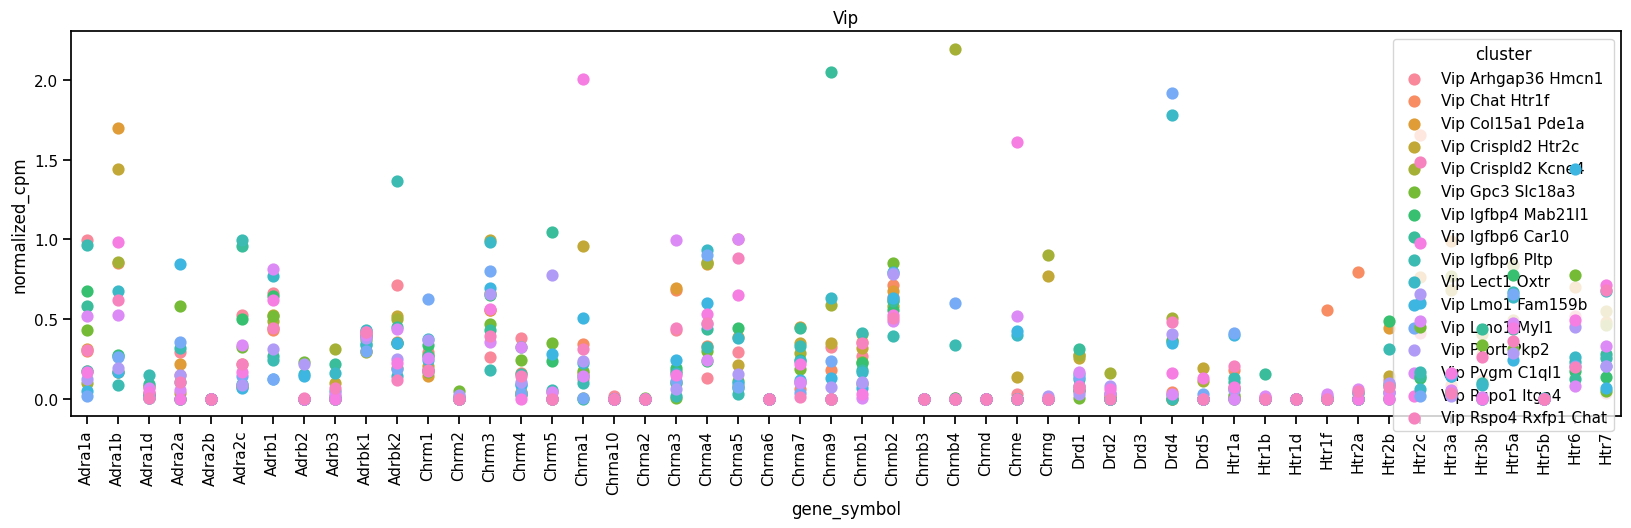

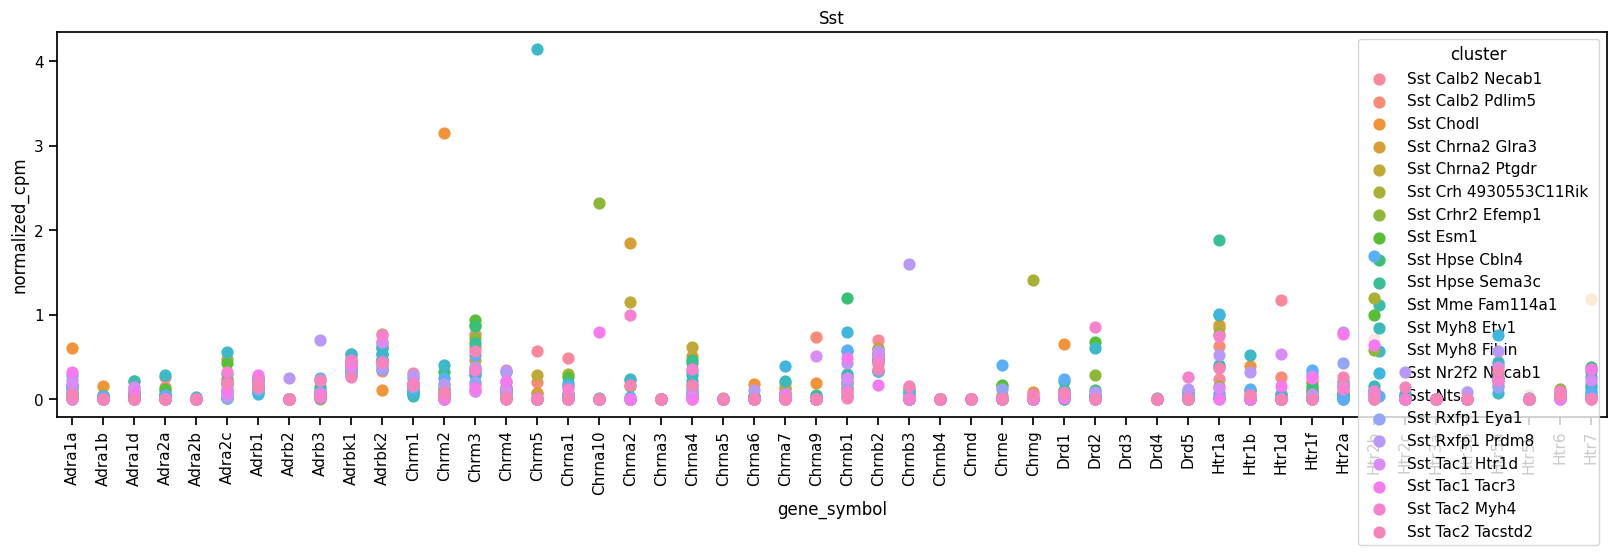

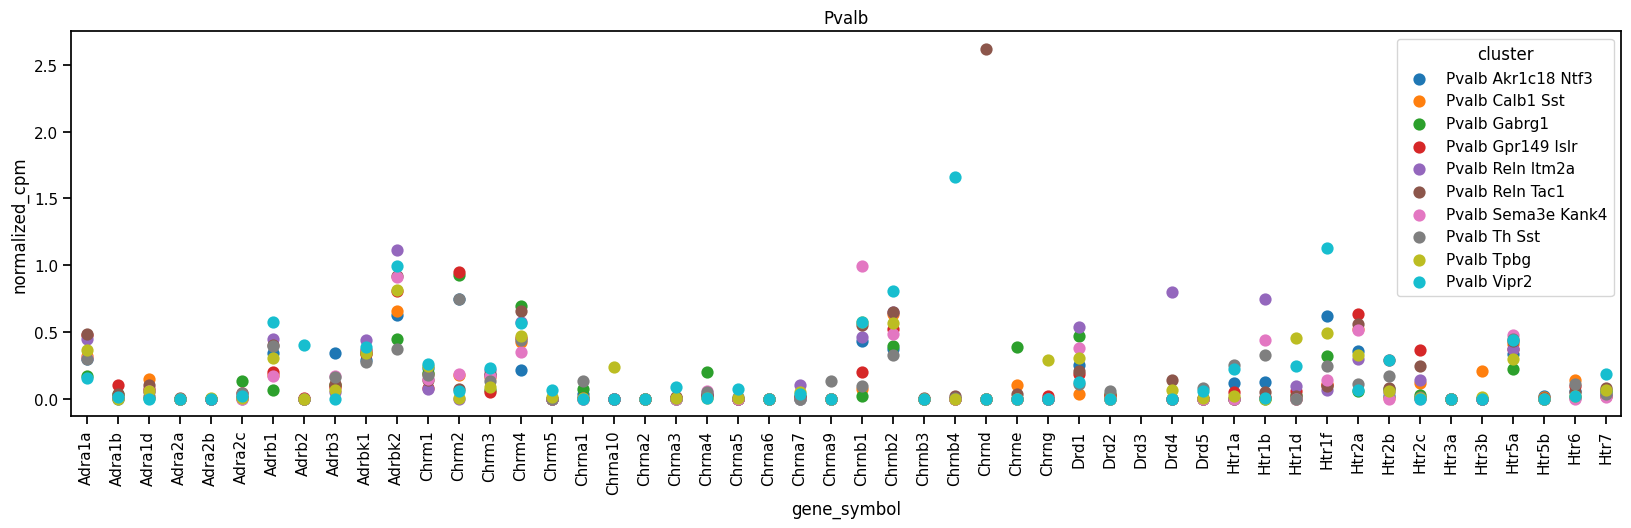

In [ ]:
# plot average expression level per gene for each cluster within each subclass
hue_order = list(subclass_colors_dict.keys())
palette = list(subclass_colors_dict.values())

genes = norm_data.gene_symbol.unique()

for subclass in subclasses: 
    subclass_norm = norm_data[norm_data.subclass==subclass].copy()
    fig, ax = plt.subplots(figsize=(20,5))
    ax = sns.pointplot(data=subclass_norm, x='gene_symbol', y='normalized_cpm', hue='cluster', 
                       join=False, order=genes, ax=ax)
    ax.set_title(subclass)
    ax.set_xticklabels(genes, rotation=90)

/Users/marinag/anaconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/marinag/anaconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/marinag/anaconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/marinag/anaconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/marinag/anaconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/marinag/anaconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/marinag/anaconda3/lib

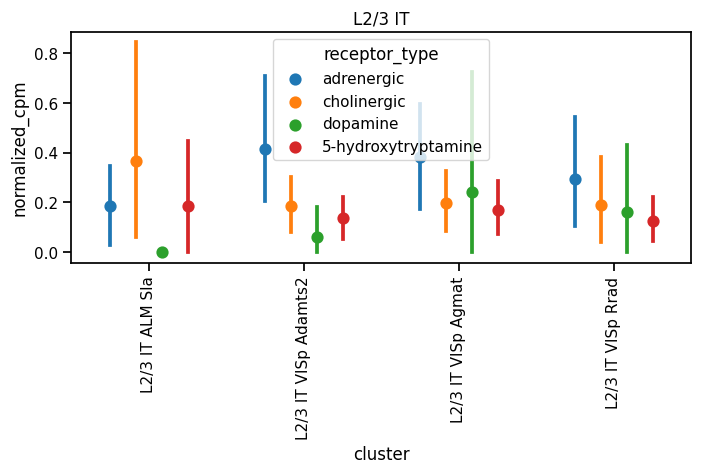

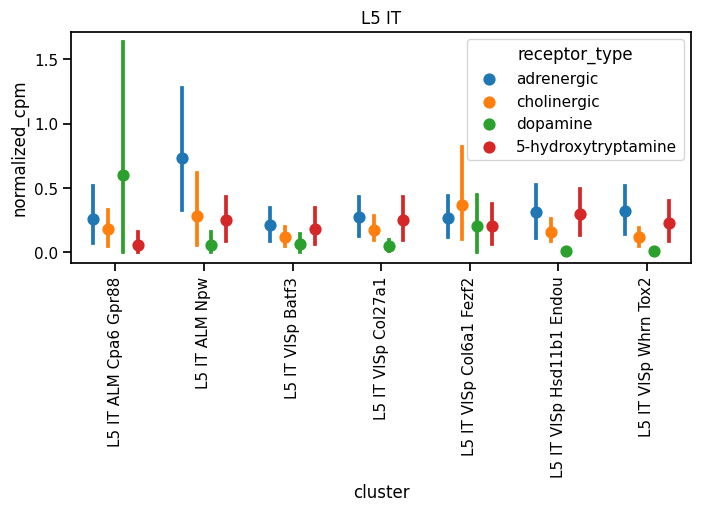

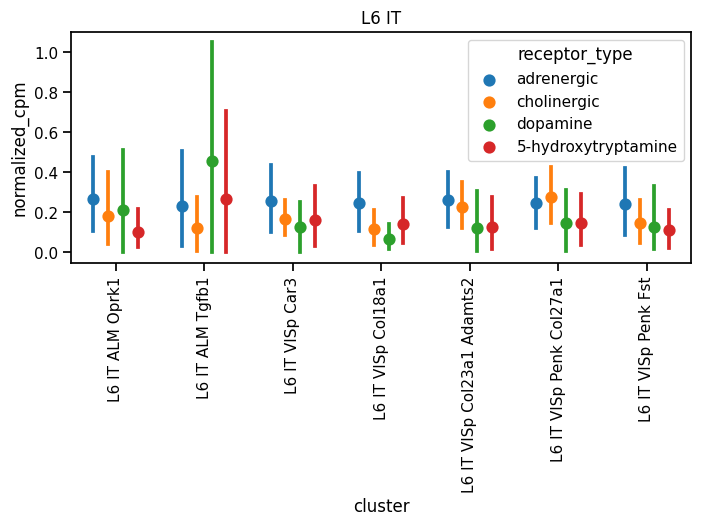

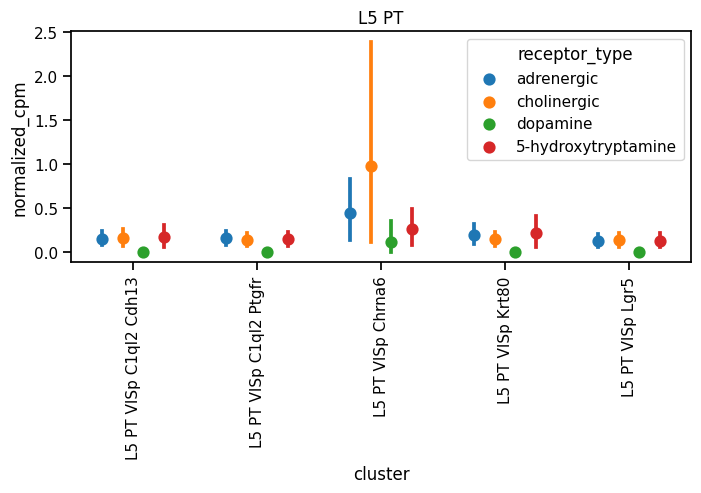

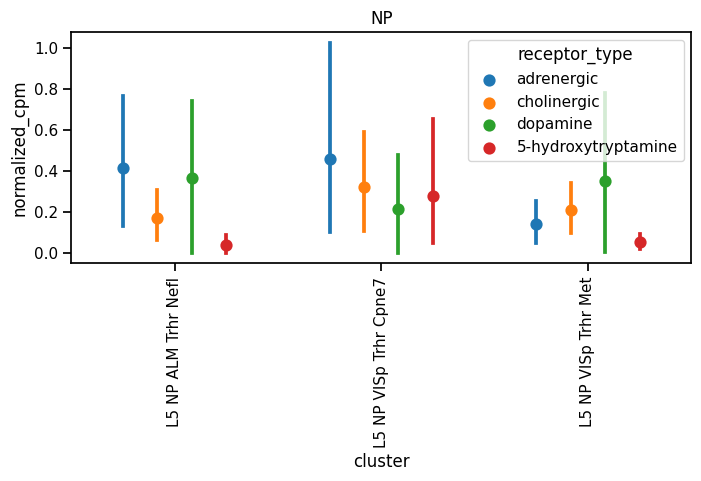

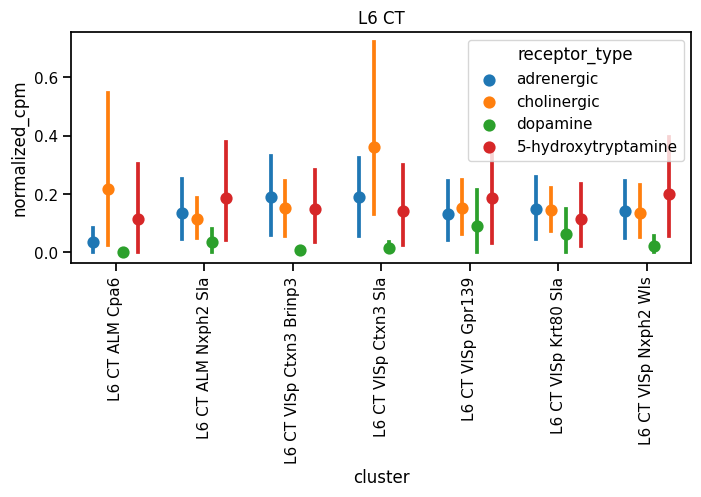

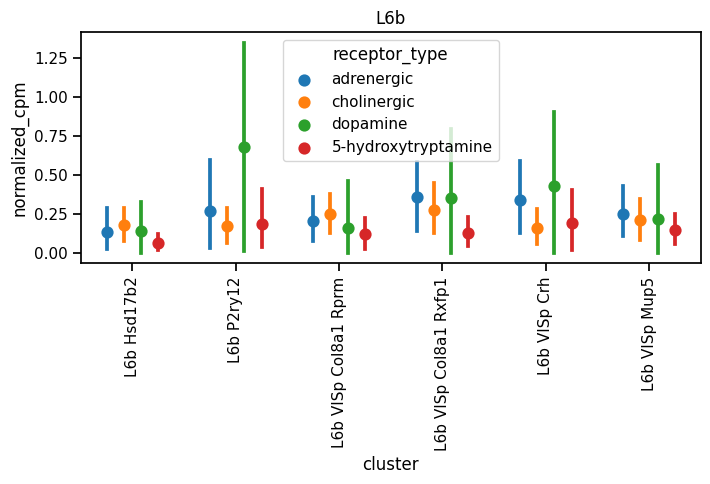

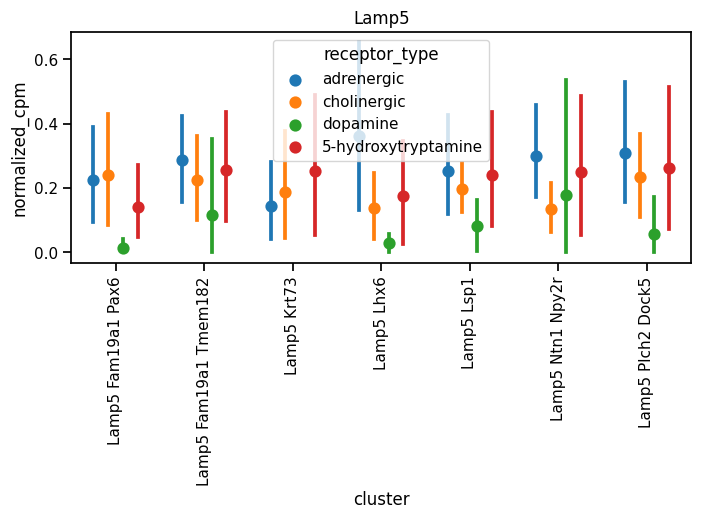

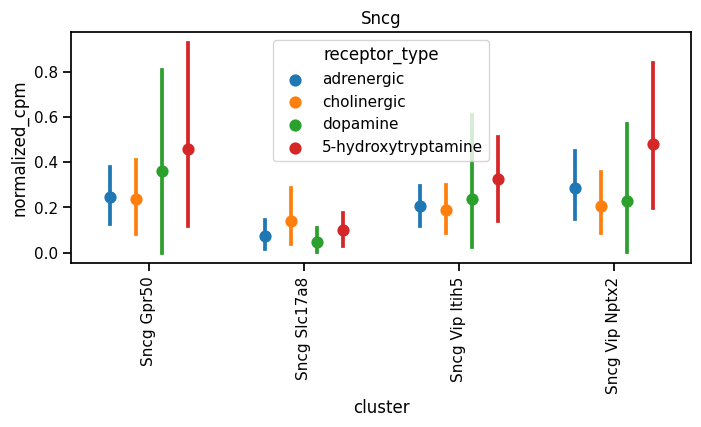

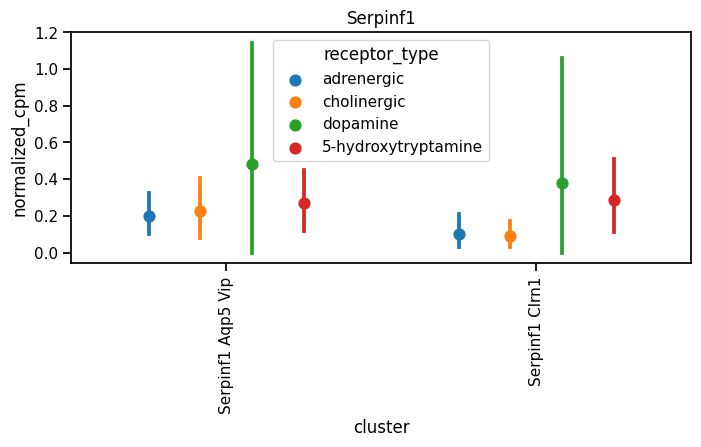

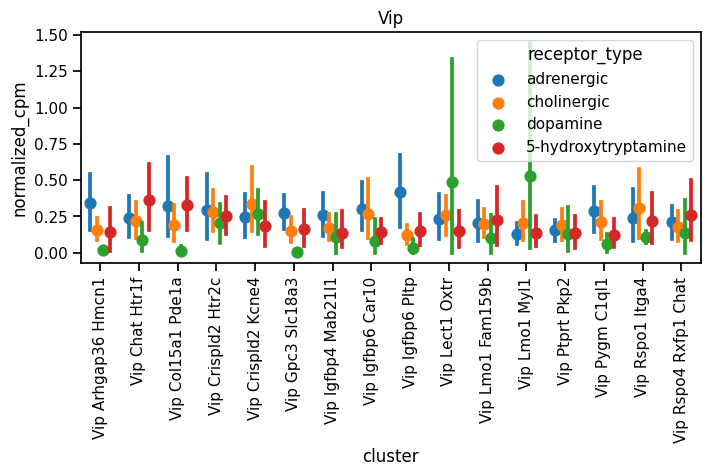

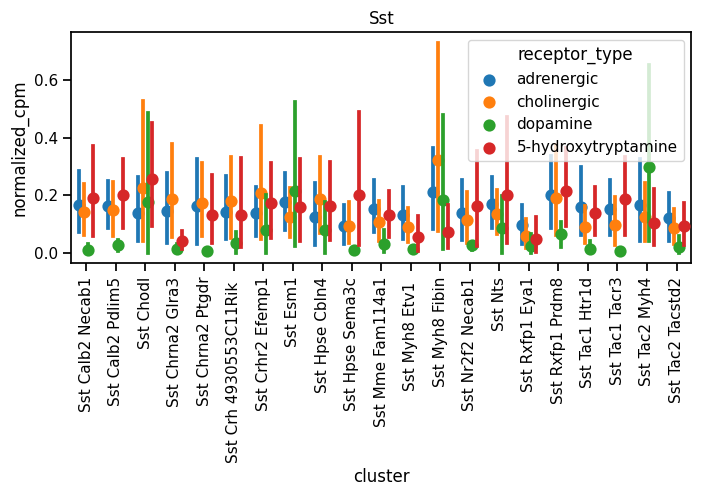

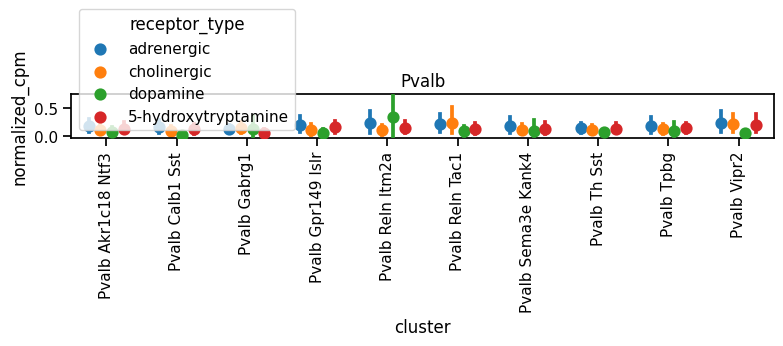

In [ ]:
# plot mean expression level for each receptor type for each cluster, separated by subclass
hue_order = list(subclass_colors_dict.keys())
palette = list(subclass_colors_dict.values())

genes = subclass_norm.gene_symbol.unique()

for subclass in subclasses: 
    subclass_norm = norm_data[norm_data.subclass==subclass].copy()
    fig, ax = plt.subplots(figsize=(8,3))
    clusters = subclass_norm.cluster.unique()
    ax= sns.pointplot(data=subclass_norm, x='cluster', order=clusters, y='normalized_cpm', hue='receptor_type', dodge=0.5, join=False, ax=ax)
    ax.set_title(subclass)
    ax.set_xticklabels(clusters, rotation=90)
fig.tight_layout();